In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# 모든 전처리

In [ ]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_int.csv')

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

In [ ]:
X_data = same_df[features]
y_data = same_df[target]

In [ ]:
# Lagged Features 생성
lags = [1, 2, 3, 5, 10]
for lag in lags:
    same_df[f'lag_{lag}'] = same_df['Close'].shift(lag)

# Lagged Features를 X_data에 추가
lag_features = [f'lag_{lag}' for lag in lags]
X_data = pd.concat([X_data, same_df[lag_features]], axis=1)

# 결측값 제거
data = pd.concat([X_data, y_data], axis=1).dropna()
X_data = data[features + lag_features]
y_data = data['Close']

# 트리 기반 모델로 중요도 평가
model = RandomForestRegressor(random_state=42)
model.fit(X_data, y_data)

# 특성 중요도 계산
importances = model.feature_importances_

# 중요도가 높은 특성 선택
selected_features = [X_data.columns[i] for i in range(len(importances)) if importances[i] > 0.01]
print("Selected features:", selected_features)

Selected features: ['High', 'Low', 'lag_1', 'lag_2']


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from sklearn.ensemble import RandomForestRegressor

In [ ]:


# 데이터 로드
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')

# 기존 Feature와 Target 변수 설정
original_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
                     'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
                     'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
                     'US_Inflation', 'KR_Inflation', 'CN_Inflation',
                     'US_GDP_Annual', 'KR_GDP_Annual', 'CN_GDP_Annual',
                     'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
                     'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange',
                     'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
                     'US_President_Republican', 'US_President_Democratic',
                     'KR_President_Democratic', 'KR_President_Conservative',
                     'KR_President_Neutral']
target = 'Close'

X_data = same_df[original_features]
y_data = same_df[target]

# PACF 계산
pacf_values = pacf(y_data, nlags=20)

# PACF 값을 기준으로 유의미한 시차를 선택
threshold = 0.05  # 중요도 기준
selected_lags = [lag for lag, value in enumerate(pacf_values) if abs(value) > threshold and lag > 0]
print(f"Selected lags based on PACF: {selected_lags}")

# Lagged Features 생성
for lag in selected_lags:
    same_df[f'lag_{lag}'] = same_df[target].shift(lag)

# Lagged Features 추가
lag_features = [f'lag_{lag}' for lag in selected_lags]
X_data = pd.concat([X_data, same_df[lag_features]], axis=1)

# 결측값 제거 (Lagged Features로 인해 NaN 발생)
X_data = X_data.dropna()
y_data = y_data[X_data.index]

# RandomForest로 Feature Importance 계산
model = RandomForestRegressor(random_state=42)
model.fit(X_data, y_data)

# 중요도 기반 Feature Selection
importances = model.feature_importances_
all_features = X_data.columns
selected_features = [all_features[i] for i in range(len(importances)) if importances[i] > 0.05]

print(f"Final selected features: {selected_features}")


Selected lags based on PACF: [1, 3]
Final selected features: ['High', 'Low', 'lag_1']


# Outlier 전

In [ ]:
same = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_same.csv')

In [ ]:
interp = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_int.csv')

In [ ]:
same.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Change', 'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment',
       'US_President', 'KR_President', 'Covid19'],
      dtype='object')

In [ ]:
def one_hot_encoding(df, columns):
    for c in columns:
        one_hot = pd.get_dummies(df[c], prefix = c)
        df = pd.concat([df.drop(c, axis = 1), one_hot], axis = 1)
    return df

In [ ]:
columns_encode = ['US_President', 'KR_President']
final_same_df = one_hot_encoding(same, columns_encode)
final_same_df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,...,Exchange,SOX_Close,Phone,KR_Unemployment,Covid19,US_President_1.0,US_President_2.0,KR_President_1.0,KR_President_2.0,KR_President_3.0
0,99,2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.060340e+12,...,1276.4,570.3,7.1,4.4,False,True,False,True,False,False
1,100,2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.060340e+12,...,1270.1,670.2,7.1,4.4,False,True,False,True,False,False
2,101,2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.060340e+12,...,1255.0,653.8,7.1,4.4,False,True,False,True,False,False
3,102,2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.060340e+12,...,1263.5,617.5,7.1,4.4,False,True,False,True,False,False
4,103,2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.060340e+12,...,1265.8,634.2,7.1,4.4,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5959,2024-09-24,62800,63400,62400,63200,26957500,0.009585,1703714000000,9.183370e+12,...,1334.9,5091.8,18.3,2.5,False,True,False,False,True,False
5861,5960,2024-09-25,63800,64200,62200,62200,28652438,-0.015823,1782181643600,9.183370e+12,...,1331.0,5132.5,18.3,2.5,False,True,False,False,True,False
5862,5961,2024-09-26,63900,64900,63700,64700,37566015,0.040193,2430521170500,9.183370e+12,...,1327.2,5310.5,18.3,2.5,False,True,False,False,True,False
5863,5962,2024-09-27,64700,65400,64200,64200,28433030,-0.007728,1825400526000,9.183370e+12,...,1318.6,5217.2,18.3,2.5,False,True,False,False,True,False


In [ ]:
final_same_df = final_same_df.rename(columns = {'US_President_1.0' : 'US_President_Republican',
       'US_President_2.0' : 'US_President_Democratic', 'KR_President_1.0' : 'KR_President_Democratic',
       'KR_President_2.0' : 'KR_President_Conservative','KR_President_3.0' : 'KR_President_Neutral'})

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

In [ ]:
X_data = final_same_df[features]
y_data = final_same_df[target]

In [ ]:
X_data.columns

Index(['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral'],
      dtype='object')

In [ ]:
# Lagged Features 생성
lags = [1, 2, 3, 5, 10]
for lag in lags:
    same_df[f'lag_{lag}'] = same_df['Close'].shift(lag)

# Lagged Features를 X_data에 추가
lag_features = [f'lag_{lag}' for lag in lags]
X_data = pd.concat([X_data, same_df[lag_features]], axis=1)

# 결측값 제거
data = pd.concat([X_data, y_data], axis=1).dropna()
X_data = data[features + lag_features]
y_data = data['Close']

# 트리 기반 모델로 중요도 평가
model = RandomForestRegressor(random_state=42)
model.fit(X_data, y_data)

# 특성 중요도 계산
importances = model.feature_importances_

# 중요도가 높은 특성 선택
selected_features = [X_data.columns[i] for i in range(len(importances)) if importances[i] > 0.005]
print("Selected features:", selected_features)

Selected features: ['High', 'Low', 'SOX_Close', 'lag_1', 'lag_10']


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from sklearn.ensemble import RandomForestRegressor

# PACF 계산
pacf_values = pacf(y_data, nlags=20)

# PACF 값을 기준으로 유의미한 시차를 선택
threshold = 0.05  # 중요도 기준
selected_lags = [lag for lag, value in enumerate(pacf_values) if abs(value) > threshold and lag > 0]
print(f"Selected lags based on PACF: {selected_lags}")

# Lagged Features 생성
for lag in selected_lags:
    same_df[f'lag_{lag}'] = same_df[target].shift(lag)

# Lagged Features 추가
lag_features = [f'lag_{lag}' for lag in selected_lags]
X_data = pd.concat([X_data, same_df[lag_features]], axis=1)

# 결측값 제거 (Lagged Features로 인해 NaN 발생)
X_data = X_data.dropna()
y_data = y_data[X_data.index]

# RandomForest로 Feature Importance 계산
model = RandomForestRegressor(random_state=42)
model.fit(X_data, y_data)

# 중요도 기반 Feature Selection
importances = model.feature_importances_
all_features = X_data.columns
selected_features = [all_features[i] for i in range(len(importances)) if importances[i] > 0.05]

print(f"Final selected features: {selected_features}")


Selected lags based on PACF: [1, 2]


KeyError: "None of [Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,\n       ...\n       5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864],\n      dtype='int64', length=5863)] are in the [columns]"

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

# 데이터 로드
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')

# 기존 Feature와 Target 설정
original_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
                     'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
                     'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
                     'US_Inflation', 'KR_Inflation', 'CN_Inflation',
                     'US_GDP_Annual', 'KR_GDP_Annual', 'CN_GDP_Annual',
                     'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
                     'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange',
                     'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
                     'US_President_Republican', 'US_President_Democratic',
                     'KR_President_Democratic', 'KR_President_Conservative',
                     'KR_President_Neutral']
target = 'Close'

X_data = same_df[original_features]
y_data = same_df[target]

# Time Series Split 설정
tscv = TimeSeriesSplit(n_splits=5)

# LightGBM Scikit-learn API 사용
feature_importance_df = pd.DataFrame({'Feature': original_features, 'Importance': [0] * len(original_features)})

for train_index, test_index in tscv.split(X_data):
    X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]

    # LightGBM Regressor
    model = lgb.LGBMRegressor(
        objective='regression',
        boosting_type='gbdt',
        learning_rate=0.05,
        num_leaves=31,
        n_estimators=100,
        random_state=42
    )

    # 모델 훈련
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
    )

    # Feature Importance 누적
    feature_importance_df['Importance'] += model.feature_importances_

# 중요도 높은 Feature 선택
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
threshold = 50  # 임계값
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

print(f"Selected Features: {selected_features}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3452
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 31
[LightGBM] [Info] Start training from score 8.795563
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3702
[LightGBM] [Info] Number of data points in the train set: 1957, number of used features: 32
[LightGBM] [Info] Start training from score 9.076135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, 

In [ ]:
x = ['High', 'Low', 'Change', 'Volume', 'SOX_Close', 'SE_Foreign', 'Open', 'KR_10', 'Exchange', 'US_10', 'Transaction', 'WTI', 'SE_Total_Equity', 'KR_Inflation', 'KR_Unemployment', 'US_Inflation', 'US_Base', 'CN_Inflation', 'US_Economic_Growth_Rate', 'US_President_Republican', 'KR_Base', 'US_GDP_Annual', 'CN_GDP_Annual', 'KR_GDP_Annual', 'Phone', 'KR_Economic_Growth_Rate', 'SE_Total_Liabilities']
len(x)

27

In [ ]:
y = ['High', 'Low', 'Change', 'Volume', 'SOX_Close', 'SE_Foreign', 'Open', 'KR_10', 'Exchange', 'US_10', 'Transaction', 'WTI', 'SE_Total_Equity', 'KR_Inflation', 'KR_Unemployment', 'US_Inflation', 'US_Base', 'CN_Inflation']
len(y)

18

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Mutual Information 계산
mi_scores = mutual_info_regression(X_data, y_data)
mi_scores = pd.Series(mi_scores, index=X_data.columns).sort_values(ascending=False)

# 상위 중요 feature 선택
# 상위 20% feature 선택
threshold = mi_scores.quantile(0.6)
selected_features = mi_scores[mi_scores > threshold].index.tolist()

print(f"Selected Features: {selected_features}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features: ['Low', 'High', 'Open', 'KR_Inflation', 'SE_Total_Equity', 'SE_Total_Liabilities', 'US_Inflation', 'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Revenue', 'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_GDP_Annual', 'CN_Inflation']


In [ ]:
x = ['Low', 'High', 'Open', 'KR_Inflation', 'SE_Total_Equity', 'SE_Total_Liabilities', 'US_Inflation', 'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Revenue', 'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_GDP_Annual', 'CN_Inflation', 'Phone', 'US_GDP_Annual', 'SOX_Close', 'SE_Foreign', 'KR_10', 'KR_Base', 'KR_Economic_Growth_Rate', 'US_Base', 'WTI', 'US_10', 'Exchange', 'KR_Unemployment', 'Volume', 'Transaction', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Conservative', 'KR_President_Democratic', 'Change', 'Covid19']
len(x)

34

In [ ]:
x = ['Low', 'High', 'Open', 'KR_Inflation', 'SE_Total_Equity', 'SE_Total_Liabilities', 'US_Inflation', 'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Revenue', 'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_GDP_Annual', 'CN_Inflation', 'Phone', 'US_GDP_Annual', 'SOX_Close', 'SE_Foreign', 'KR_10', 'KR_Base', 'KR_Economic_Growth_Rate', 'US_Base', 'WTI', 'US_10', 'Exchange', 'KR_Unemployment', 'Volume', 'Transaction', 'US_President_Democratic', 'US_President_Republican', 'KR_President_Conservative', 'KR_President_Democratic', 'Change', 'Covid19']
len(x)

34

In [ ]:
y = ['Low', 'High', 'Open', 'KR_Inflation', 'SE_Total_Equity', 'SE_Total_Liabilities', 'US_Inflation', 'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Revenue', 'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_GDP_Annual', 'CN_Inflation', 'Phone', 'US_GDP_Annual', 'SOX_Close', 'SE_Foreign', 'KR_10', 'KR_Base', 'KR_Economic_Growth_Rate', 'US_Base', 'WTI', 'US_10', 'Exchange', 'KR_Unemployment', 'Volume', 'Transaction', 'US_President_Republican', 'US_President_Democratic']
len(y)

30

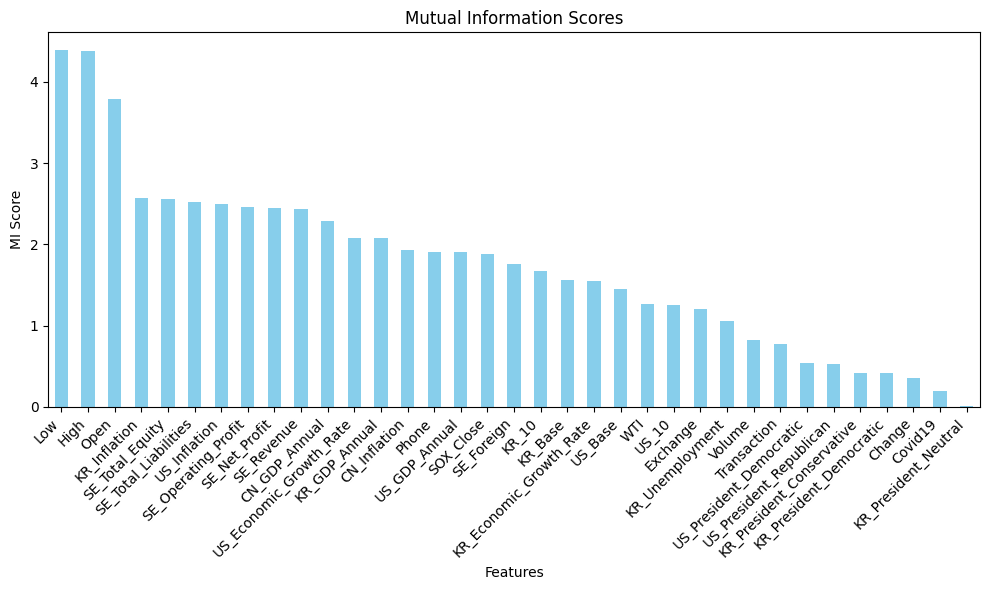

In [ ]:
import matplotlib.pyplot as plt

# Bar Plot
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 여기서부터 보시오!!!!!!!!!!!!!!!!!!!1

Final Data

In [ ]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_int.csv')

In [ ]:
same_df.head()

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
0,2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,0.304463,21.695398,29.834928,29.42326,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
1,2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.304463,21.659975,29.834928,29.42326,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2,2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,1.027374,22.927728,29.834928,29.42326,...,-3.095450,8.122668,8.116716,8.116716,8.116716,True,False,True,False,False
3,2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.750286,22.530686,29.834928,29.42326,...,-3.095450,8.237479,8.116716,8.116716,8.116716,True,False,True,False,False
4,2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.318066,21.911760,29.834928,29.42326,...,-3.396056,8.268732,8.116716,8.116716,8.116716,True,False,True,False,False


In [ ]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5862 non-null   object 
 1   Open                       5862 non-null   float64
 2   High                       5862 non-null   float64
 3   Low                        5862 non-null   float64
 4   Close                      5862 non-null   float64
 5   Volume                     5862 non-null   float64
 6   Change                     5862 non-null   float64
 7   Transaction                5862 non-null   float64
 8   SE_Operating_Profit        5862 non-null   float64
 9   SE_Net_Profit              5862 non-null   float64
 10  SE_Total_Equity            5862 non-null   float64
 11  SE_Total_Liabilities       5862 non-null   float64
 12  SE_Revenue                 5862 non-null   float64
 13  SE_Foreign                 5862 non-null   float

In [ ]:
same_df['Date'] = pd.to_datetime(same_df['Date'])
int_df['Date'] = pd.to_datetime(int_df['Date'])

In [ ]:
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

In [ ]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5862 entries, 2001-01-02 to 2024-09-30
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5862 non-null   float64
 1   High                       5862 non-null   float64
 2   Low                        5862 non-null   float64
 3   Close                      5862 non-null   float64
 4   Volume                     5862 non-null   float64
 5   Change                     5862 non-null   float64
 6   Transaction                5862 non-null   float64
 7   SE_Operating_Profit        5862 non-null   float64
 8   SE_Net_Profit              5862 non-null   float64
 9   SE_Total_Equity            5862 non-null   float64
 10  SE_Total_Liabilities       5862 non-null   float64
 11  SE_Revenue                 5862 non-null   float64
 12  SE_Foreign                 5862 non-null   float64
 13  US_Inflation               586

No Outlier

In [ ]:
same_df_1 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_same.csv')
int_df_1 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_final_int.csv')

In [ ]:
same_df_1.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,...,BB_High,BB_Low,RSI,Volume_Price_Ratio,Volume_Momentum,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90
0,99,2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.060340e+12,...,4674.156324,3317.843676,87.234267,235.560299,-31984.0,0.071642,3350.0,3350.0,3350.0,3350.0
1,100,2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.060340e+12,...,4674.156324,3317.843676,87.234267,224.671513,-31984.0,0.059347,3350.0,3350.0,3350.0,3350.0
2,101,2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.060340e+12,...,4674.156324,3317.843676,87.234267,634.457143,1641105.0,0.055556,3370.0,3350.0,3350.0,3350.0
3,102,2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.060340e+12,...,4674.156324,3317.843676,87.234267,400.703590,-835504.0,0.056410,3780.0,3350.0,3350.0,3350.0
4,103,2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.060340e+12,...,4674.156324,3317.843676,87.234267,218.018299,-716833.0,0.033505,3900.0,3350.0,3350.0,3350.0


In [ ]:
same_df_1.drop(columns = ['Unnamed: 0'], inplace = True)
int_df_1.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
same_df_1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment',
       'US_President', 'KR_President', 'Covid19', 'BB_High', 'BB_Low', 'RSI',
       'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1',
       'Lag_30', 'Lag_60', 'Lag_90'],
      dtype='object')

In [ ]:
same_df_1.head()

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,BB_High,BB_Low,RSI,Volume_Price_Ratio,Volume_Momentum,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90
0,2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.060340e+12,6.002880e+12,...,4674.156324,3317.843676,87.234267,235.560299,-31984.0,0.071642,3350.0,3350.0,3350.0,3350.0
1,2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.060340e+12,6.002880e+12,...,4674.156324,3317.843676,87.234267,224.671513,-31984.0,0.059347,3350.0,3350.0,3350.0,3350.0
2,2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.060340e+12,6.002880e+12,...,4674.156324,3317.843676,87.234267,634.457143,1641105.0,0.055556,3370.0,3350.0,3350.0,3350.0
3,2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.060340e+12,6.002880e+12,...,4674.156324,3317.843676,87.234267,400.703590,-835504.0,0.056410,3780.0,3350.0,3350.0,3350.0
4,2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.060340e+12,6.002880e+12,...,4674.156324,3317.843676,87.234267,218.018299,-716833.0,0.033505,3900.0,3350.0,3350.0,3350.0


In [ ]:
same_df_1['Date'] = pd.to_datetime(same_df_1['Date'])
int_df_1['Date'] = pd.to_datetime(int_df_1['Date'])

In [ ]:
same_df_1.set_index('Date')
int_df_1.set_index('Date')

,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,SE_Total_Equity,...,BB_High,BB_Low,RSI,Volume_Price_Ratio,Volume_Momentum,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.070090e+12,6.002880e+12,1.678550e+13,...,4674.156324,3317.843676,87.234267,235.560299,-31984.0,0.071642,3350.0,3350.0,3350.0,3350.0
2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.079520e+12,6.002880e+12,1.678550e+13,...,4674.156324,3317.843676,87.234267,224.671513,-31984.0,0.059347,3350.0,3350.0,3350.0,3350.0
2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.088620e+12,6.002880e+12,1.678550e+13,...,4674.156324,3317.843676,87.234267,634.457143,1641105.0,0.055556,3370.0,3370.0,3370.0,3370.0
2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.097401e+12,6.002880e+12,1.678550e+13,...,4674.156324,3317.843676,87.234267,400.703590,-835504.0,0.056410,3780.0,3780.0,3780.0,3780.0
2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.121873e+12,6.002880e+12,1.678550e+13,...,4674.156324,3317.843676,87.234267,218.018299,-716833.0,0.033505,3900.0,3900.0,3900.0,3900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,62800,63400,62400,63200,26957500,0.009585,1703714000000,3.279430e+14,1.010090e+13,3.862814e+14,...,79694.052019,59335.947981,26.061574,426.542722,-1584876.0,0.015823,62600.0,62600.0,62600.0,62600.0
2024-09-25,63800,64200,62200,62200,28652438,-0.015823,1782181643600,3.393928e+14,1.010090e+13,3.862814e+14,...,78665.401755,58814.598245,24.370687,460.650129,1694938.0,0.032154,63200.0,63200.0,63200.0,63200.0
2024-09-26,63900,64900,63700,64700,37566015,0.040193,2430521170500,3.511122e+14,1.010090e+13,3.862814e+14,...,77638.072666,58701.927334,35.616990,580.618470,8913577.0,0.018547,62200.0,62200.0,62200.0,62200.0


In [ ]:
def one_hot_encoding(df, columns):
    for c in columns:
        one_hot = pd.get_dummies(df[c], prefix = c)
        df = pd.concat([df.drop(c, axis = 1), one_hot], axis = 1)
    return df

In [ ]:
columns_encode = ['US_President', 'KR_President']
same_df_1 = one_hot_encoding(same_df_1, columns_encode)
same_df_1

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_1.0,US_President_2.0,KR_President_1.0,KR_President_2.0,KR_President_3.0
0,2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.060340e+12,6.002880e+12,...,0.071642,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
1,2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.060340e+12,6.002880e+12,...,0.059347,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
2,2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.060340e+12,6.002880e+12,...,0.055556,3370.0,3350.0,3350.0,3350.0,True,False,True,False,False
3,2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.060340e+12,6.002880e+12,...,0.056410,3780.0,3350.0,3350.0,3350.0,True,False,True,False,False
4,2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.060340e+12,6.002880e+12,...,0.033505,3900.0,3350.0,3350.0,3350.0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,2024-09-24,62800,63400,62400,63200,26957500,0.009585,1703714000000,9.183370e+12,1.010090e+13,...,0.015823,62600.0,74700.0,81300.0,78400.0,True,False,False,True,False
5858,2024-09-25,63800,64200,62200,62200,28652438,-0.015823,1782181643600,9.183370e+12,1.010090e+13,...,0.032154,63200.0,73400.0,81600.0,78300.0,True,False,False,True,False
5859,2024-09-26,63900,64900,63700,64700,37566015,0.040193,2430521170500,9.183370e+12,1.010090e+13,...,0.018547,62200.0,74700.0,81500.0,78200.0,True,False,False,True,False
5860,2024-09-27,64700,65400,64200,64200,28433030,-0.007728,1825400526000,9.183370e+12,1.010090e+13,...,0.018692,64700.0,75500.0,81800.0,77400.0,True,False,False,True,False


In [ ]:
same_df_1 = same_df_1.rename(columns = {'US_President_1.0' : 'US_President_Republican',
       'US_President_2.0' : 'US_President_Democratic', 'KR_President_1.0' : 'KR_President_Democratic',
       'KR_President_2.0' : 'KR_President_Conservative','KR_President_3.0' : 'KR_President_Neutral'})

In [ ]:
same_df_1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90',
       'US_President_Republican', 'US_President_Democratic',
       'KR_President_Democratic', 'KR_President_Conservative',
       'KR_President_Neutral'],
      dtype='object')

In [ ]:
columns_encode = ['US_President', 'KR_President']
int_df_1 = one_hot_encoding(int_df_1, columns_encode)
int_df_1

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_1.0,US_President_2.0,KR_President_1.0,KR_President_2.0,KR_President_3.0
0,2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.070090e+12,6.002880e+12,...,0.071642,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
1,2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.079520e+12,6.002880e+12,...,0.059347,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
2,2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.088620e+12,6.002880e+12,...,0.055556,3370.0,3370.0,3370.0,3370.0,True,False,True,False,False
3,2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.097401e+12,6.002880e+12,...,0.056410,3780.0,3780.0,3780.0,3780.0,True,False,True,False,False
4,2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.121873e+12,6.002880e+12,...,0.033505,3900.0,3900.0,3900.0,3900.0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,2024-09-24,62800,63400,62400,63200,26957500,0.009585,1703714000000,3.279430e+14,1.010090e+13,...,0.015823,62600.0,62600.0,62600.0,62600.0,True,False,False,True,False
5858,2024-09-25,63800,64200,62200,62200,28652438,-0.015823,1782181643600,3.393928e+14,1.010090e+13,...,0.032154,63200.0,63200.0,63200.0,63200.0,True,False,False,True,False
5859,2024-09-26,63900,64900,63700,64700,37566015,0.040193,2430521170500,3.511122e+14,1.010090e+13,...,0.018547,62200.0,62200.0,62200.0,62200.0,True,False,False,True,False
5860,2024-09-27,64700,65400,64200,64200,28433030,-0.007728,1825400526000,3.631042e+14,1.010090e+13,...,0.018692,64700.0,64700.0,64700.0,64700.0,True,False,False,True,False


In [ ]:
int_df_1 = int_df_1.rename(columns = {'US_President_1.0' : 'US_President_Republican',
       'US_President_2.0' : 'US_President_Democratic', 'KR_President_1.0' : 'KR_President_Democratic',
       'KR_President_2.0' : 'KR_President_Conservative','KR_President_3.0' : 'KR_President_Neutral'})

In [ ]:
int_df_1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90',
       'US_President_Republican', 'US_President_Democratic',
       'KR_President_Democratic', 'KR_President_Conservative',
       'KR_President_Neutral'],
      dtype='object')

No outlier + Scaling

In [ ]:
same_df_3 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/mk_scaled_same.csv')
int_df_3 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/mk_scaled_int.csv')

In [ ]:
same_df_3.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,...,BB_High,BB_Low,RSI,Volume_Price_Ratio,Volume_Momentum,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90
0,99,2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,2.966717,21.695398,29.834928,...,8.449804,8.10707,4.468597,5.461967,-0.011072,-2.636077,8.116716,8.116716,8.116716,8.116716
1,100,2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.262797,21.659975,29.834928,...,8.449804,8.10707,4.468597,5.414639,-0.011072,-2.824351,8.116716,8.116716,8.116716,8.116716
2,101,2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,6.039041,22.927728,29.834928,...,8.449804,8.10707,4.468597,6.452770,0.483975,-2.890372,8.122668,8.116716,8.116716,8.116716
3,102,2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.549734,22.530686,29.834928,...,8.449804,8.10707,4.468597,5.993222,-0.248825,-2.875104,8.237479,8.116716,8.116716,8.116716
4,103,2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.291321,21.911760,29.834928,...,8.449804,8.10707,4.468597,5.384579,-0.213711,-3.396056,8.268732,8.116716,8.116716,8.116716


In [ ]:
same_df_3.drop(columns = ['Unnamed: 0'], inplace = True)
int_df_3.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
same_df_3.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment',
       'US_President', 'KR_President', 'Covid19', 'BB_High', 'BB_Low', 'RSI',
       'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1',
       'Lag_30', 'Lag_60', 'Lag_90'],
      dtype='object')

In [ ]:
same_df_3['Date'] = pd.to_datetime(same_df_3['Date'])
int_df_3['Date'] = pd.to_datetime(int_df_3['Date'])

In [ ]:
same_df_3.set_index('Date')
int_df_3.set_index('Date')

,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,SE_Total_Equity,...,BB_High,BB_Low,RSI,Volume_Price_Ratio,Volume_Momentum,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,2.966717,21.695398,29.836003,29.423260,30.451537,...,8.449804,8.107070,4.468597,5.461967,-0.011072,-2.636077,8.116716,8.116716,8.116716,8.116716
2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.262797,21.659975,29.837042,29.423260,30.451537,...,8.449804,8.107070,4.468597,5.414639,-0.011072,-2.824351,8.116716,8.116716,8.116716,8.116716
2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,6.039041,22.927728,29.838044,29.423260,30.451537,...,8.449804,8.107070,4.468597,6.452770,0.483975,-2.890372,8.122668,8.122668,8.122668,8.122668
2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.549734,22.530686,29.839010,29.423260,30.451537,...,8.449804,8.107070,4.468597,5.993222,-0.248825,-2.875104,8.237479,8.237479,8.237479,8.237479
2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.291321,21.911760,29.841696,29.423260,30.451537,...,8.449804,8.107070,4.468597,5.384579,-0.213711,-3.396056,8.268732,8.268732,8.268732,8.268732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,11.047710,11.057219,11.041321,11.054060,17.109772,0.443262,28.163832,33.423861,29.943646,33.587587,...,11.285950,10.990971,3.260462,6.055713,-0.470555,-4.146304,11.044521,11.044521,11.044521,11.044521
2024-09-25,11.063508,11.069758,11.038110,11.038110,17.170749,-0.825280,28.208859,33.458179,29.943646,33.587587,...,11.272959,10.982145,3.193381,6.132639,0.499903,-3.437208,11.054060,11.054060,11.054060,11.054060
2024-09-26,11.065075,11.080603,11.061940,11.077516,17.441610,1.971470,28.519127,33.492127,29.943646,33.587587,...,11.259813,10.980228,3.572823,6.364094,2.635813,-3.987440,11.038110,11.038110,11.038110,11.038110


In [ ]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5862 entries, 2001-01-02 to 2024-09-30
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5862 non-null   float64
 1   High                       5862 non-null   float64
 2   Low                        5862 non-null   float64
 3   Close                      5862 non-null   float64
 4   Volume                     5862 non-null   float64
 5   Change                     5862 non-null   float64
 6   Transaction                5862 non-null   float64
 7   SE_Operating_Profit        5862 non-null   float64
 8   SE_Net_Profit              5862 non-null   float64
 9   SE_Total_Equity            5862 non-null   float64
 10  SE_Total_Liabilities       5862 non-null   float64
 11  SE_Revenue                 5862 non-null   float64
 12  SE_Foreign                 5862 non-null   float64
 13  US_Inflation               586

In [ ]:
columns_encode = ['US_President', 'KR_President']
same_df_3 = one_hot_encoding(same_df_3, columns_encode)
same_df_3

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_1.0,US_President_2.0,KR_President_1.0,KR_President_2.0,KR_President_3.0
0,2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,2.966717,21.695398,29.834928,29.423260,...,-2.636077,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
1,2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.262797,21.659975,29.834928,29.423260,...,-2.824351,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2,2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,6.039041,22.927728,29.834928,29.423260,...,-2.890372,8.122668,8.116716,8.116716,8.116716,True,False,True,False,False
3,2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.549734,22.530686,29.834928,29.423260,...,-2.875104,8.237479,8.116716,8.116716,8.116716,True,False,True,False,False
4,2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.291321,21.911760,29.834928,29.423260,...,-3.396056,8.268732,8.116716,8.116716,8.116716,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,2024-09-24,11.047710,11.057219,11.041321,11.054060,17.109772,0.443262,28.163832,29.848415,29.943646,...,-4.146304,11.044521,11.221235,11.305901,11.269579,True,False,False,True,False
5858,2024-09-25,11.063508,11.069758,11.038110,11.038110,17.170749,-0.825280,28.208859,29.848415,29.943646,...,-3.437208,11.054060,11.203679,11.309585,11.268303,True,False,False,True,False
5859,2024-09-26,11.065075,11.080603,11.061940,11.077516,17.441610,1.971470,28.519127,29.848415,29.943646,...,-3.987440,11.038110,11.221235,11.308358,11.267025,True,False,False,True,False
5860,2024-09-27,11.077516,11.088278,11.069758,11.069758,17.163062,-0.421123,28.232821,29.848415,29.943646,...,-3.979682,11.077516,11.231888,11.312033,11.256742,True,False,False,True,False


In [ ]:
same_df_3 = same_df_3.rename(columns = {'US_President_1.0' : 'US_President_Republican',
       'US_President_2.0' : 'US_President_Democratic', 'KR_President_1.0' : 'KR_President_Democratic',
       'KR_President_2.0' : 'KR_President_Conservative','KR_President_3.0' : 'KR_President_Neutral'})

In [ ]:
same_df_3.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90',
       'US_President_Republican', 'US_President_Democratic',
       'KR_President_Democratic', 'KR_President_Conservative',
       'KR_President_Neutral'],
      dtype='object')

In [ ]:
columns_encode = ['US_President', 'KR_President']
int_df_3 = one_hot_encoding(int_df_3, columns_encode)
int_df_3

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_1.0,US_President_2.0,KR_President_1.0,KR_President_2.0,KR_President_3.0
0,2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,2.966717,21.695398,29.836003,29.423260,...,-2.636077,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
1,2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.262797,21.659975,29.837042,29.423260,...,-2.824351,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2,2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,6.039041,22.927728,29.838044,29.423260,...,-2.890372,8.122668,8.122668,8.122668,8.122668,True,False,True,False,False
3,2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.549734,22.530686,29.839010,29.423260,...,-2.875104,8.237479,8.237479,8.237479,8.237479,True,False,True,False,False
4,2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.291321,21.911760,29.841696,29.423260,...,-3.396056,8.268732,8.268732,8.268732,8.268732,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,2024-09-24,11.047710,11.057219,11.041321,11.054060,17.109772,0.443262,28.163832,33.423861,29.943646,...,-4.146304,11.044521,11.044521,11.044521,11.044521,True,False,False,True,False
5858,2024-09-25,11.063508,11.069758,11.038110,11.038110,17.170749,-0.825280,28.208859,33.458179,29.943646,...,-3.437208,11.054060,11.054060,11.054060,11.054060,True,False,False,True,False
5859,2024-09-26,11.065075,11.080603,11.061940,11.077516,17.441610,1.971470,28.519127,33.492127,29.943646,...,-3.987440,11.038110,11.038110,11.038110,11.038110,True,False,False,True,False
5860,2024-09-27,11.077516,11.088278,11.069758,11.069758,17.163062,-0.421123,28.232821,33.525711,29.943646,...,-3.979682,11.077516,11.077516,11.077516,11.077516,True,False,False,True,False


In [ ]:
int_df_3 = int_df_3.rename(columns = {'US_President_1.0' : 'US_President_Republican',
       'US_President_2.0' : 'US_President_Democratic', 'KR_President_1.0' : 'KR_President_Democratic',
       'KR_President_2.0' : 'KR_President_Conservative','KR_President_3.0' : 'KR_President_Neutral'})

In [ ]:
int_df_3.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Transaction', 'SE_Operating_Profit', 'SE_Net_Profit',
       'SE_Total_Equity', 'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign',
       'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
       'KR_GDP_Annual', 'CN_GDP_Annual', 'US_Economic_Growth_Rate',
       'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90',
       'US_President_Republican', 'US_President_Democratic',
       'KR_President_Democratic', 'KR_President_Conservative',
       'KR_President_Neutral'],
      dtype='object')

In [ ]:
same_df.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_final.csv", index=True)
int_df.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_final.csv", index=True)
same_df_1.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_no_outlier.csv", index=False)
int_df_1.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_no_outlier.csv", index=False)
same_df_3.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_no_outlier_scaling.csv", index=False)
int_df_3.to_csv("/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/int_no_outlier_scaling.csv", index=False)

feature selection

In [ ]:
same_df_1 = same_df_1.set_index('Date')
int_df_1 = int_df_1.set_index('Date')
same_df_3 = same_df_3.set_index('Date')
int_df_3 = int_df_3.set_index('Date')

In [ ]:
int_df_1.head()

,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,SE_Total_Equity,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,3160,3380,3140,3350,789127,0.060127,2643575450,9.070090e+12,6.002880e+12,1.678550e+13,...,0.071642,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
2001-01-03,3229,3420,3220,3370,757143,0.005970,2551571910,9.079520e+12,6.002880e+12,1.678550e+13,...,0.059347,3350.0,3350.0,3350.0,3350.0,True,False,True,False,False
2001-01-04,3790,3870,3660,3780,2398248,0.121662,9065377440,9.088620e+12,6.002880e+12,1.678550e+13,...,0.055556,3370.0,3370.0,3370.0,3370.0,True,False,True,False,False
2001-01-05,3760,3920,3700,3900,1562744,0.031746,6094701600,9.097401e+12,6.002880e+12,1.678550e+13,...,0.056410,3780.0,3780.0,3780.0,3780.0,True,False,True,False,False
2001-01-08,3820,3910,3780,3880,845911,-0.005128,3282134680,9.121873e+12,6.002880e+12,1.678550e+13,...,0.033505,3900.0,3900.0,3900.0,3900.0,True,False,True,False,False


In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

In [ ]:
len(features)

45

In [ ]:
x_same = same_df[features].values
y_same = same_df[target].values

In [ ]:
x_same_1 = same_df_1[features].values
y_same_1 = same_df_1[target].values

In [ ]:
x_same_3 = same_df_3[features].values
y_same_3 = same_df_3[target].values

In [ ]:
x_int = int_df[features].values
y_int = int_df[target].values

x_int_1 = int_df_1[features].values
y_int_1 = int_df_1[target].values

x_int_3 = int_df_3[features].values
y_int_3 = int_df_3[target].values

In [ ]:
x_train_same_df = x_same[:3518]
y_train_same_df = y_same[:3518]

x_val_same_df = x_same[3518:4691]
y_val_same_df = y_same[3518:4691]

x_test_same_df = x_same[4691:]
y_test_same_df = y_same[4691:]

In [ ]:
x_train_same_df_1 = x_same_1[:3518]
y_train_same_df_1 = y_same_1[:3518]

x_val_same_df_1 = x_same_1[3518:4691]
y_val_same_df_1 = y_same_1[3518:4691]

x_test_same_df_1 = x_same_1[4691:]
y_test_same_df_1 = y_same_1[4691:]

In [ ]:
x_train_same_df_3 = x_same_3[:3519]
y_train_same_df_3 = y_same_3[:3519]

x_val_same_df_3 = x_same_3[3519:4692]
y_val_same_df_3 = y_same_3[3519:4692]

x_test_same_df_3 = x_same_3[4691:]
y_test_same_df_3 = y_same_3[4691:]

In [ ]:
x_train_int_df = x_int[:3519]
y_train_int_df = y_int[:3519]

x_val_int_df = x_int[3519:4692]
y_val_int_df = y_int[3519:4692]

x_test_int_df = x_int[4692:]
y_test_int_df = y_int[4692:]

In [ ]:
x_train_int_df_1 = x_int_1[:3519]
y_train_int_df_1 = y_int_1[:3519]

x_val_int_df_1 = x_int_1[3519:4692]
y_val_int_df_1 = y_int_1[3519:4692]

x_test_int_df_1 = x_int_1[4692:]
y_test_int_df_1 = y_int_1[4692:]

In [ ]:
x_train_int_df_3 = x_int_3[:3519]
y_train_int_df_3 = y_int_3[:3519]

x_val_int_df_3 = x_int_3[3519:4692]
y_val_int_df_3 = y_int_3[3519:4692]

x_test_int_df_3 = x_int_3[4692:]
y_test_int_df_3 = y_int_3[4692:]

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
same_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'BB_High', 'BB_Low', 'RSI',
       'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1',
       'Lag_30', 'Lag_60', 'Lag_90', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral'],
      dtype='object')

##### 50

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 9.445564


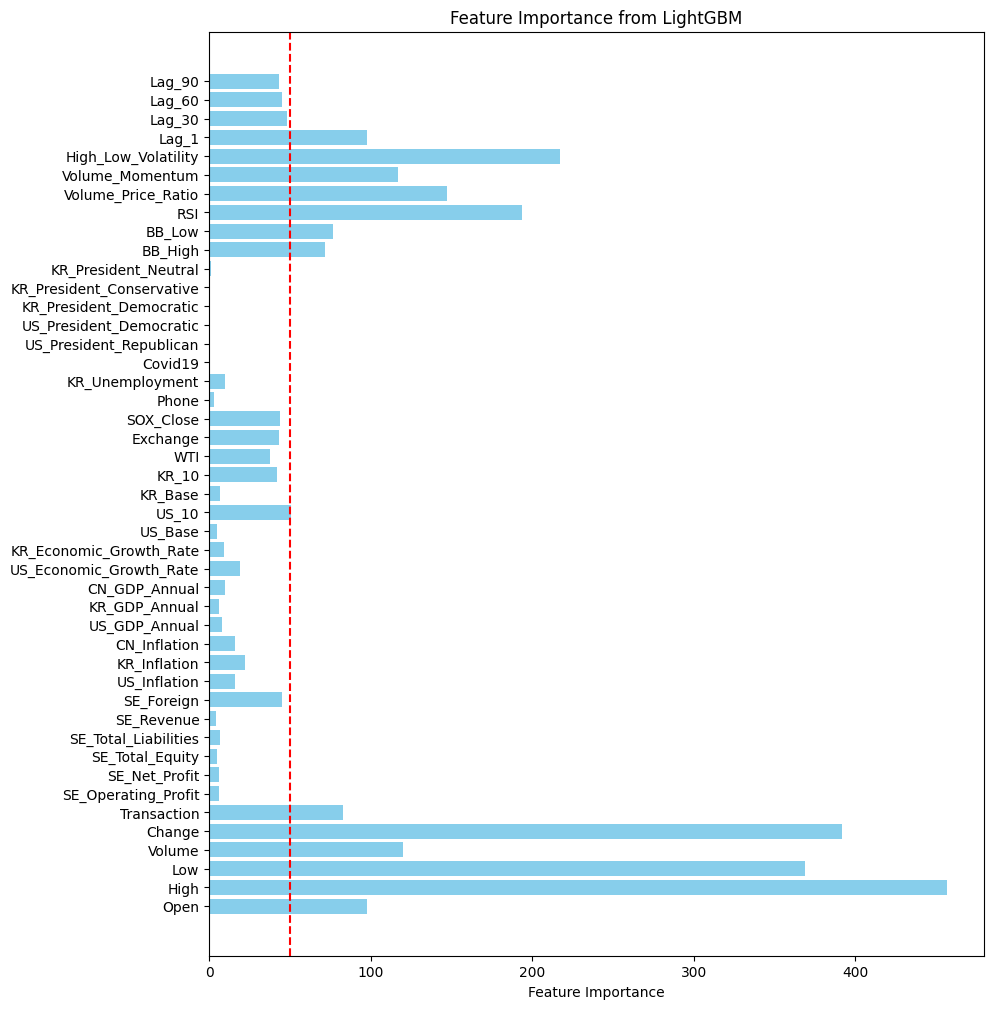

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df, label=y_train_same_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


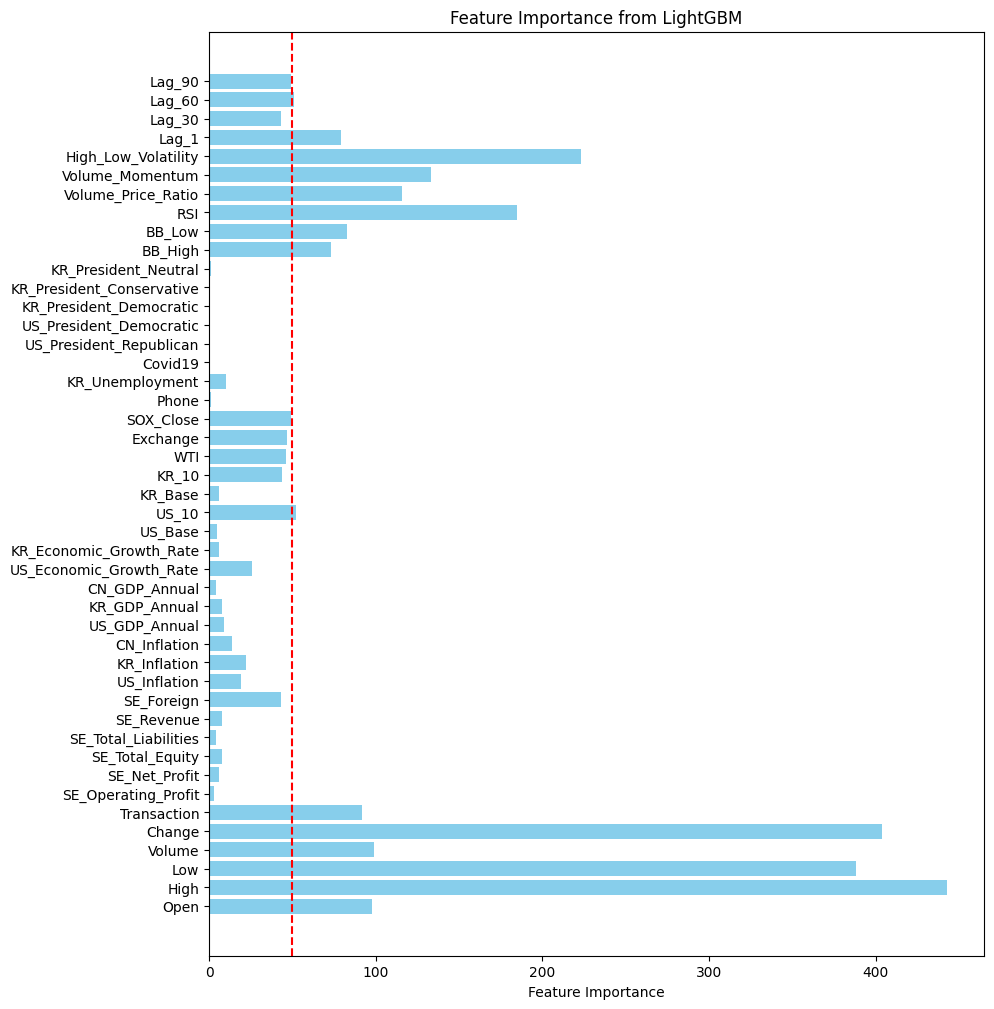

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df, label=y_train_int_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6357
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 14543.035816


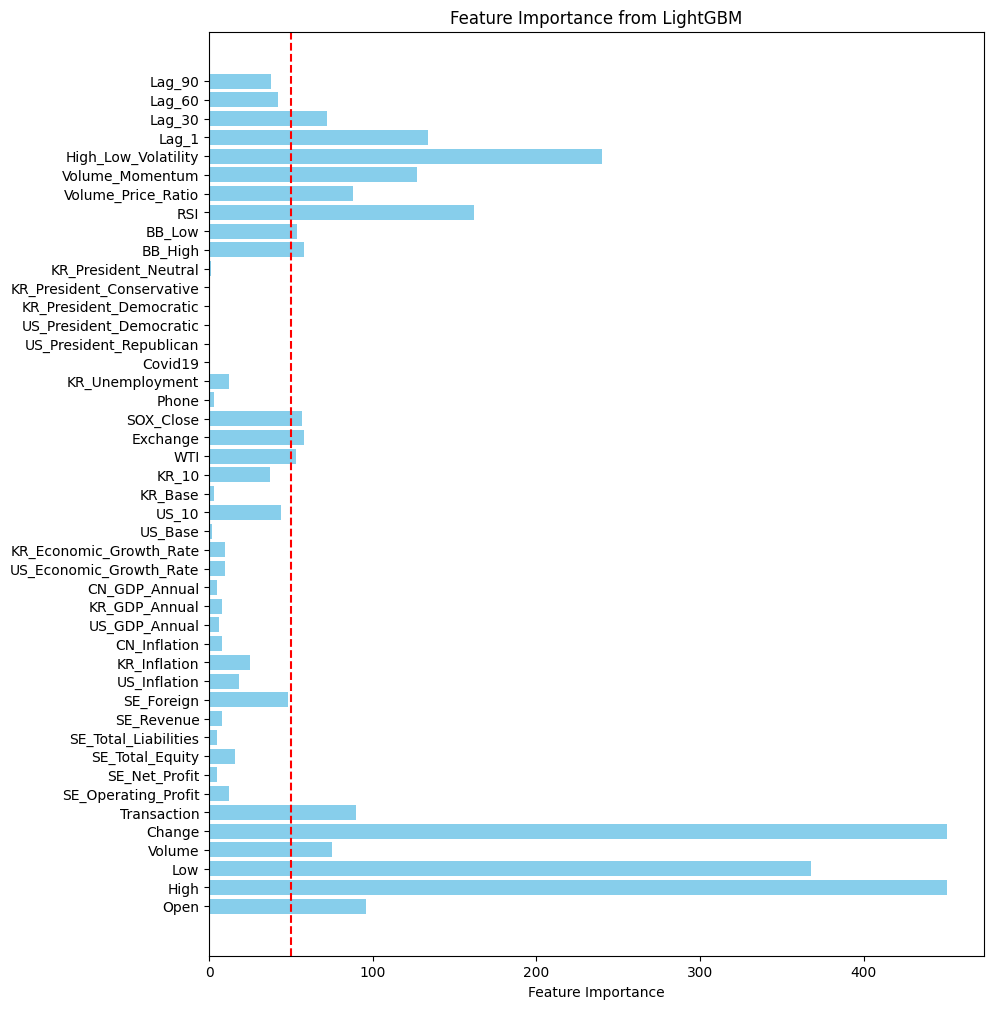

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_1, label=y_train_same_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 14547.445297


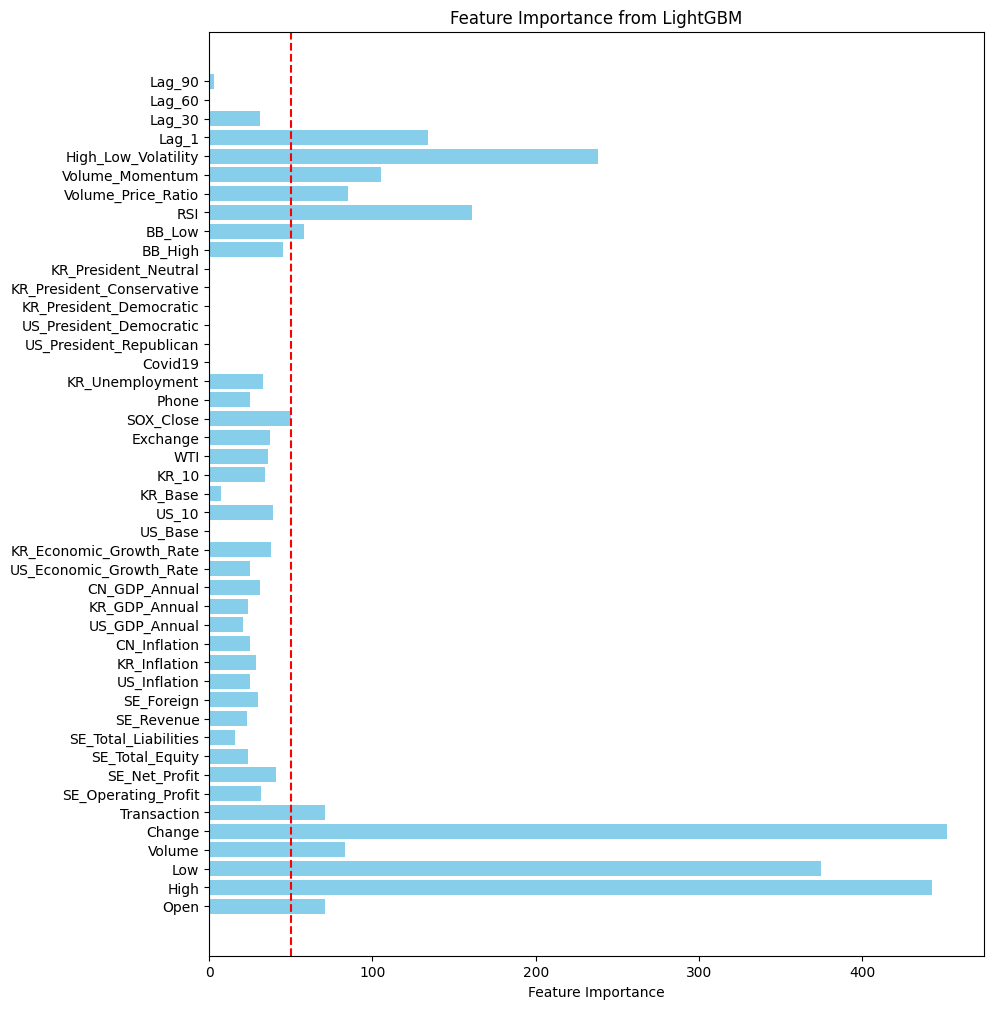

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_1, label=y_train_int_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6359
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


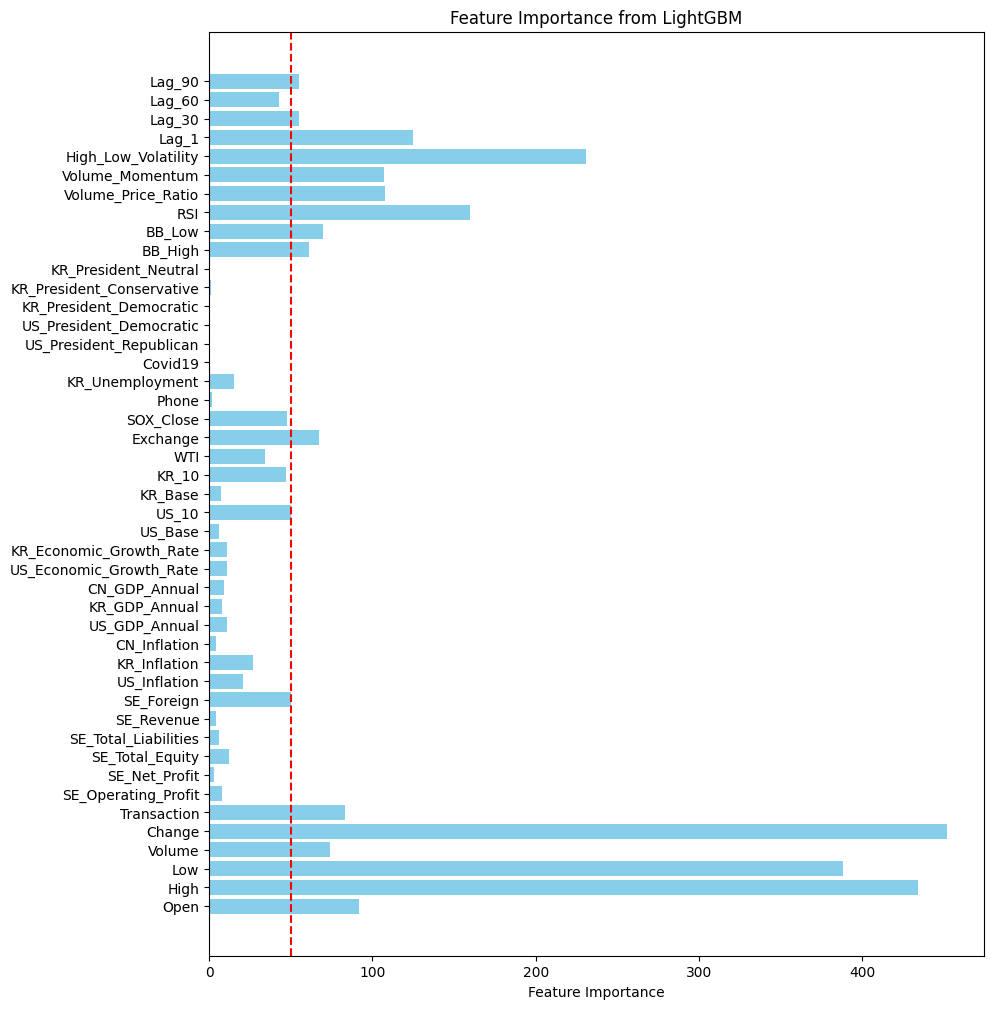

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_3, label=y_train_same_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

In [ ]:
importance

array([ 92, 434, 388,  74, 452,  83,   8,   3,  12,   6,   4,  50,  21,
        27,   4,  11,   8,   9,  11,  11,   6,  50,   7,  47,  34,  67,
        48,   2,  15,   0,   0,   0,   0,   1,   0,  61,  70, 160, 108,
       107, 231, 125,  55,  43,  55], dtype=int32)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


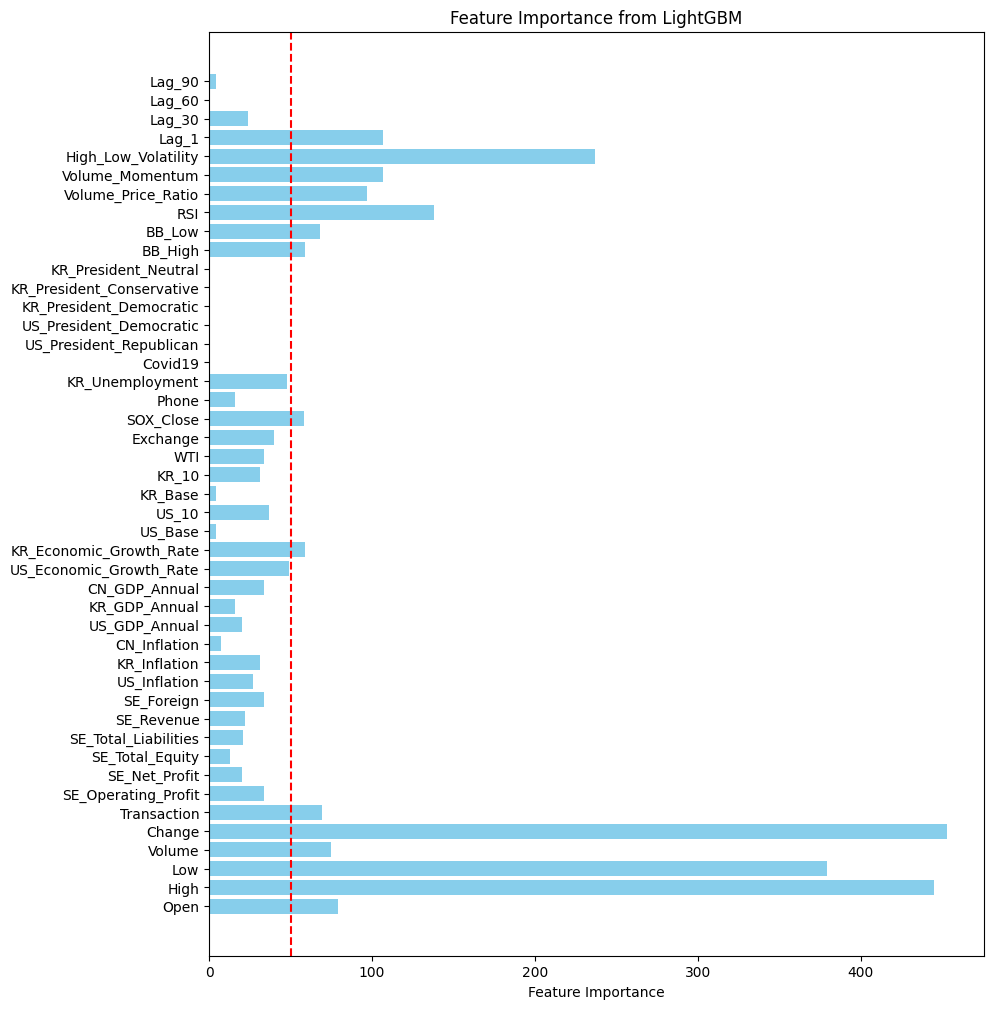

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_3, label=y_train_int_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

##### 40

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 9.445564


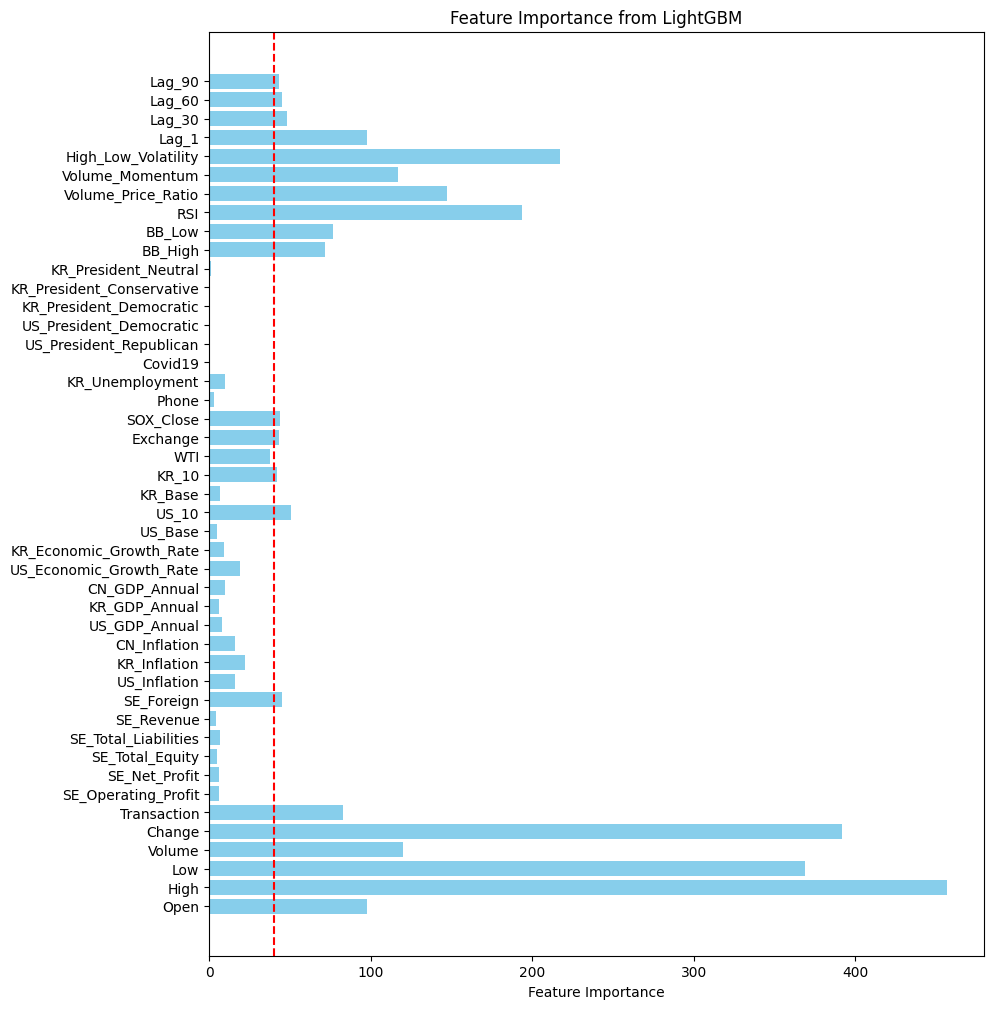

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df, label=y_train_same_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


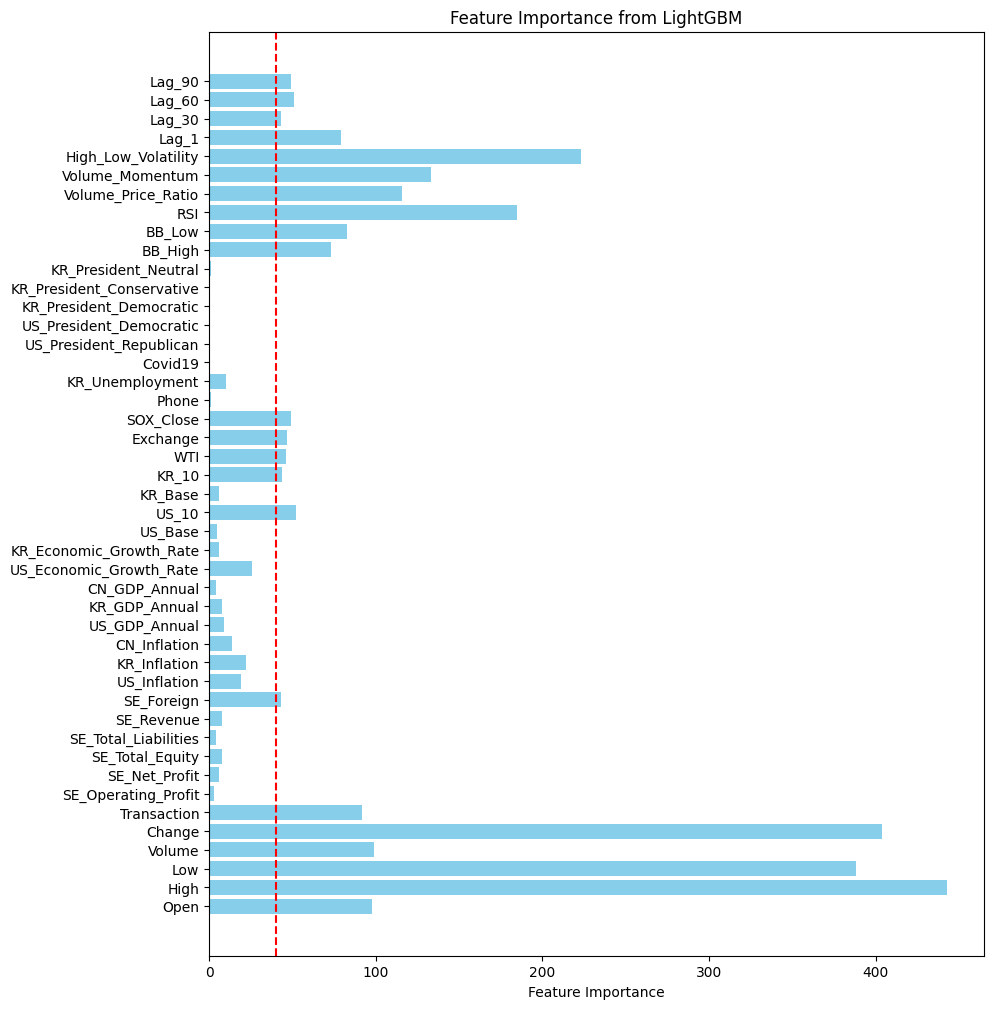

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df, label=y_train_int_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6357
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 14543.035816


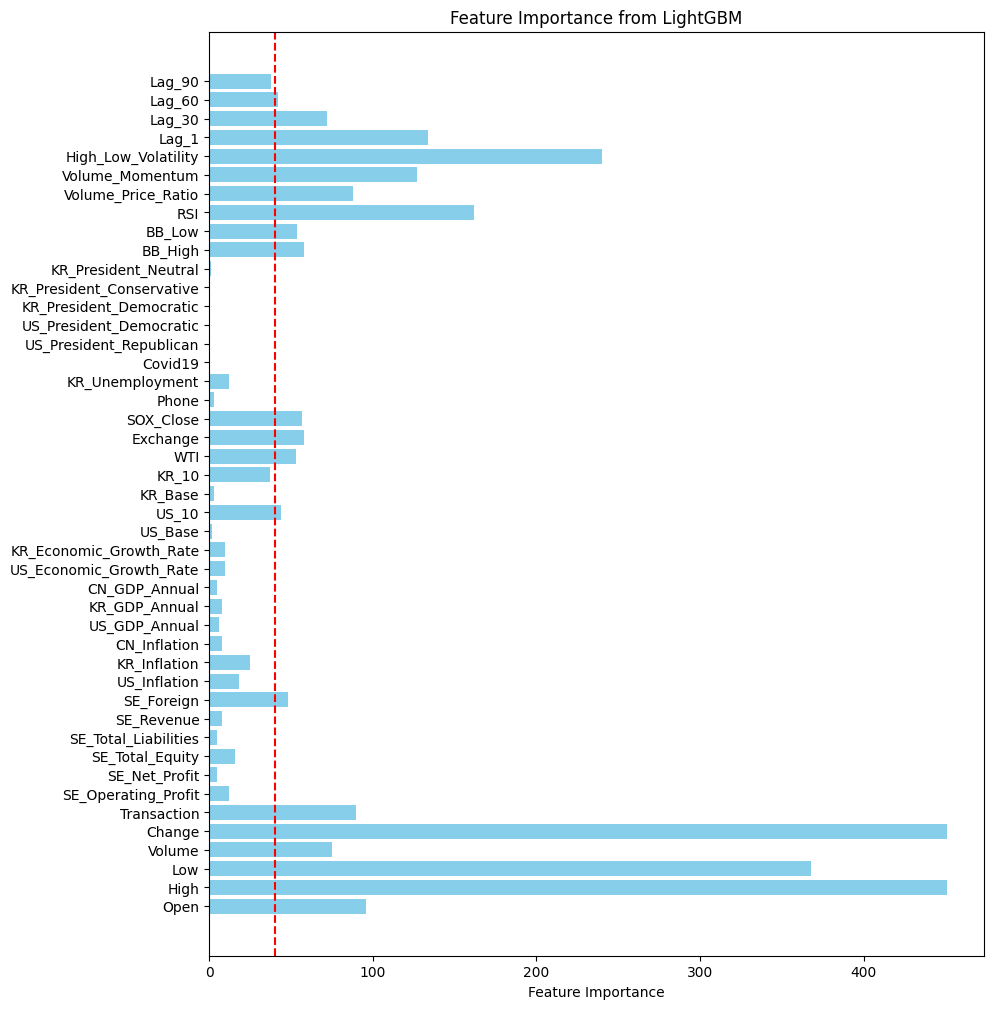

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_1, label=y_train_same_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 14547.445297


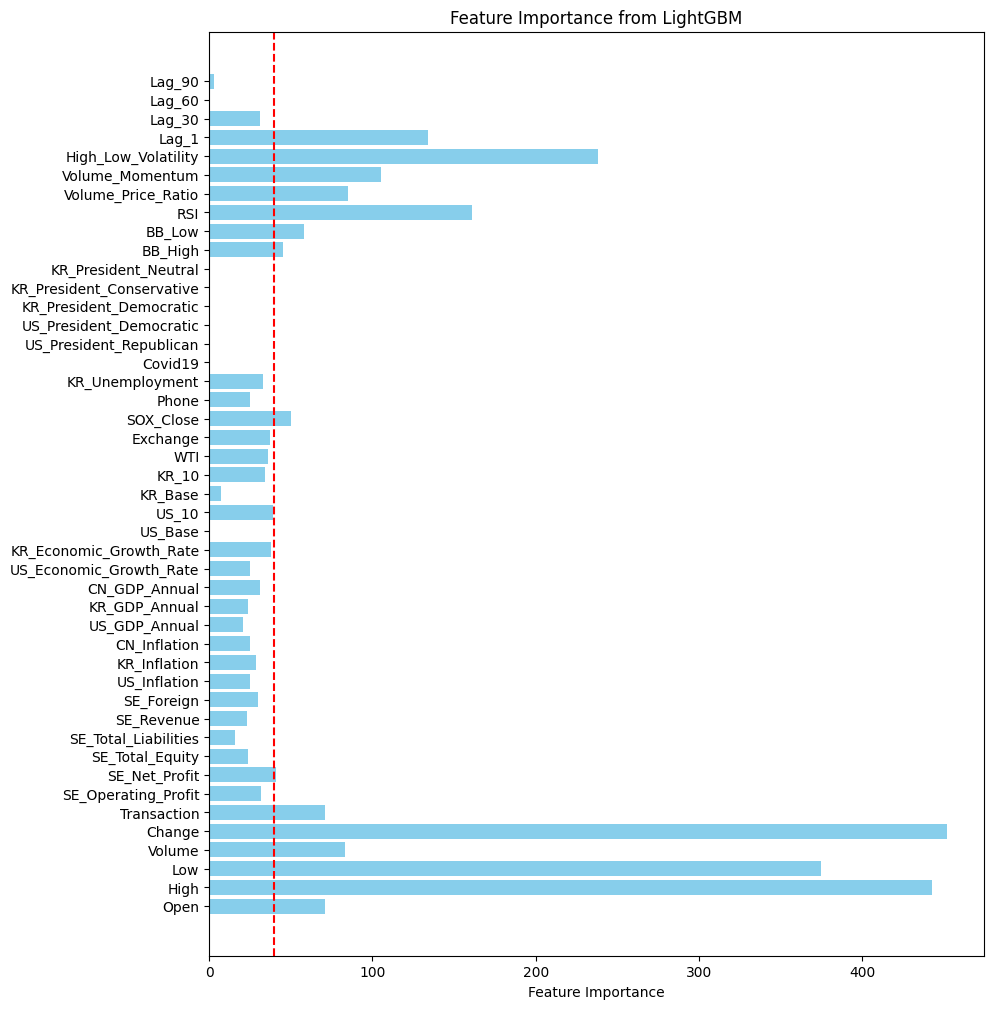

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_1, label=y_train_int_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6359
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


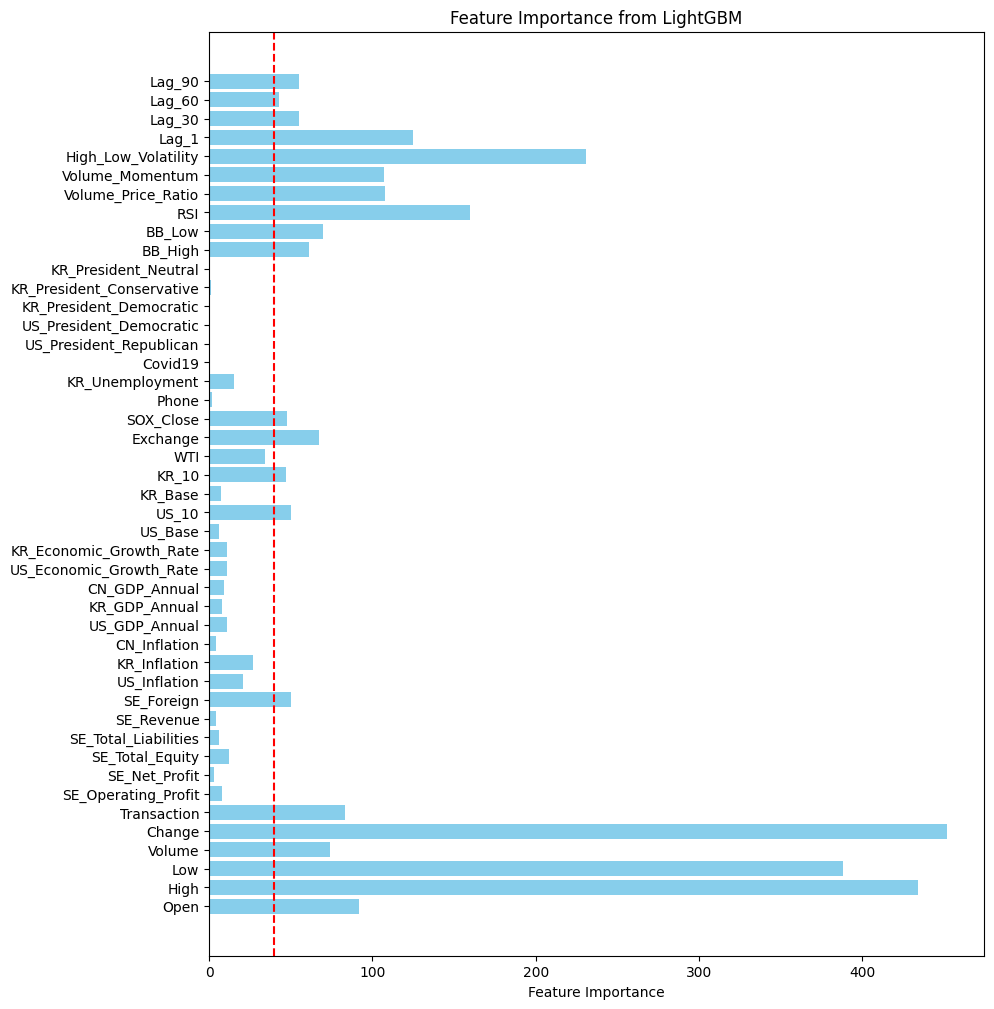

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_3, label=y_train_same_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


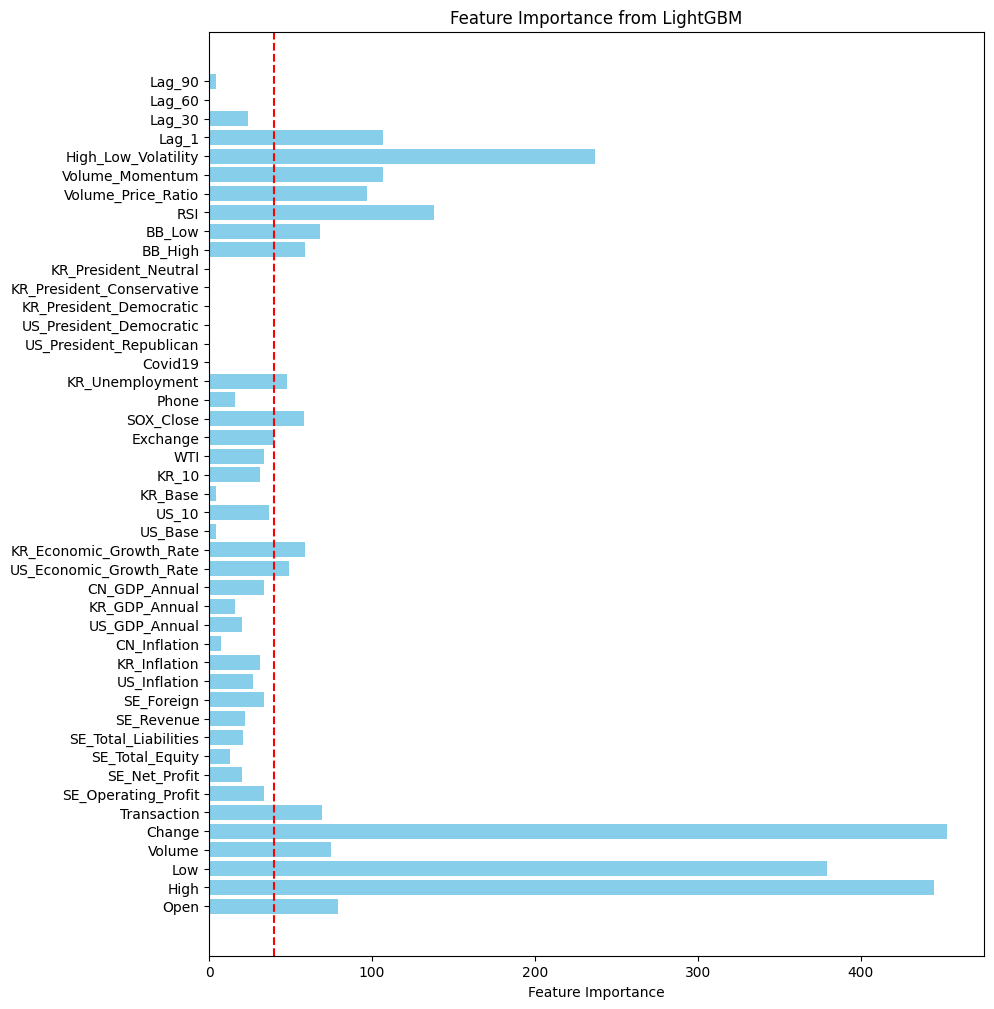

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_3, label=y_train_int_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=40, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

##### 30

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 9.445564


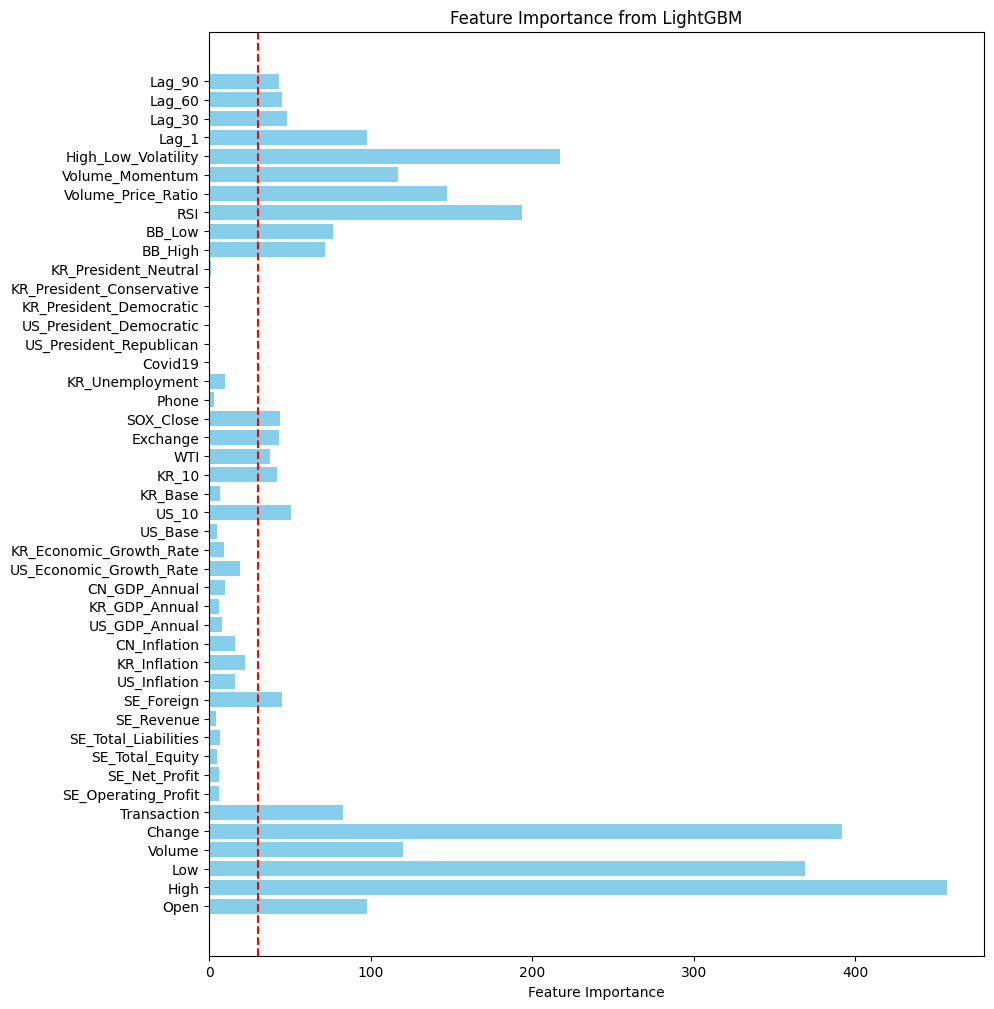

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df, label=y_train_same_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6822
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


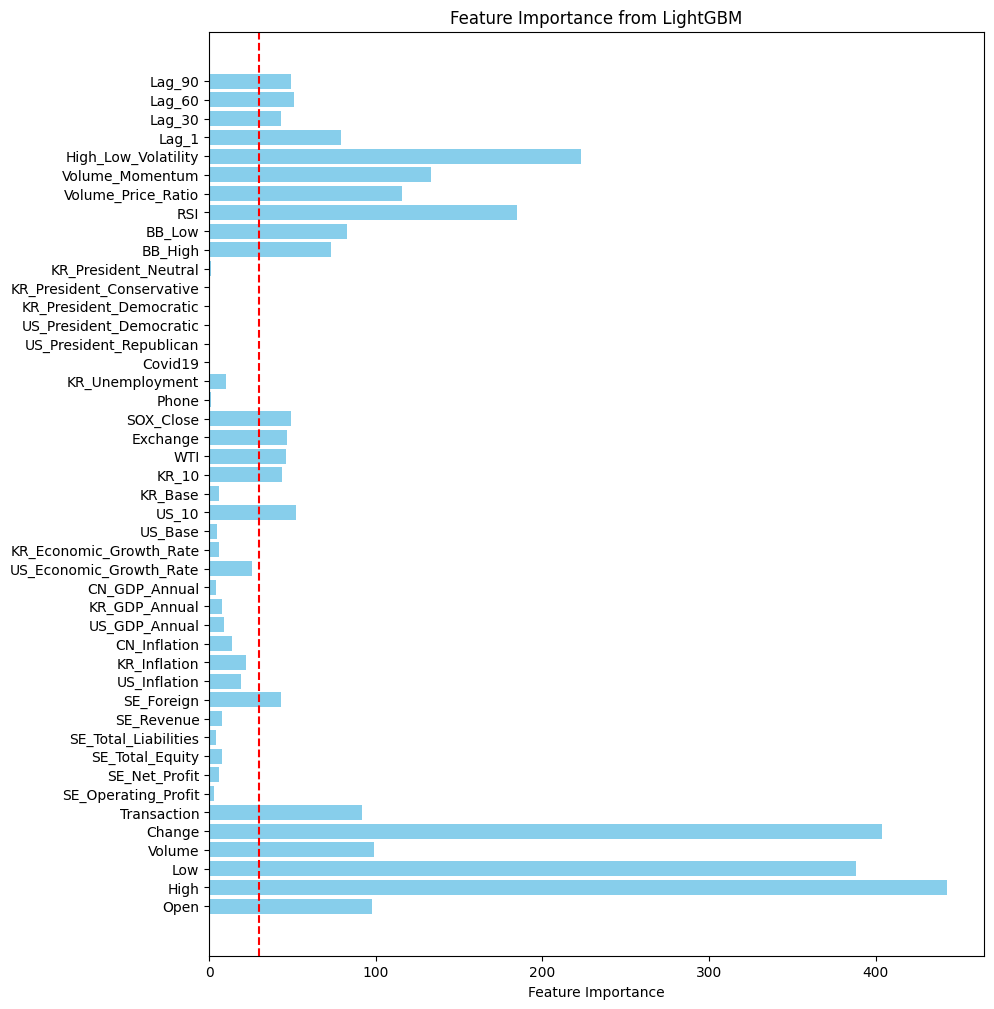

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df, label=y_train_int_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6357
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 14543.035816


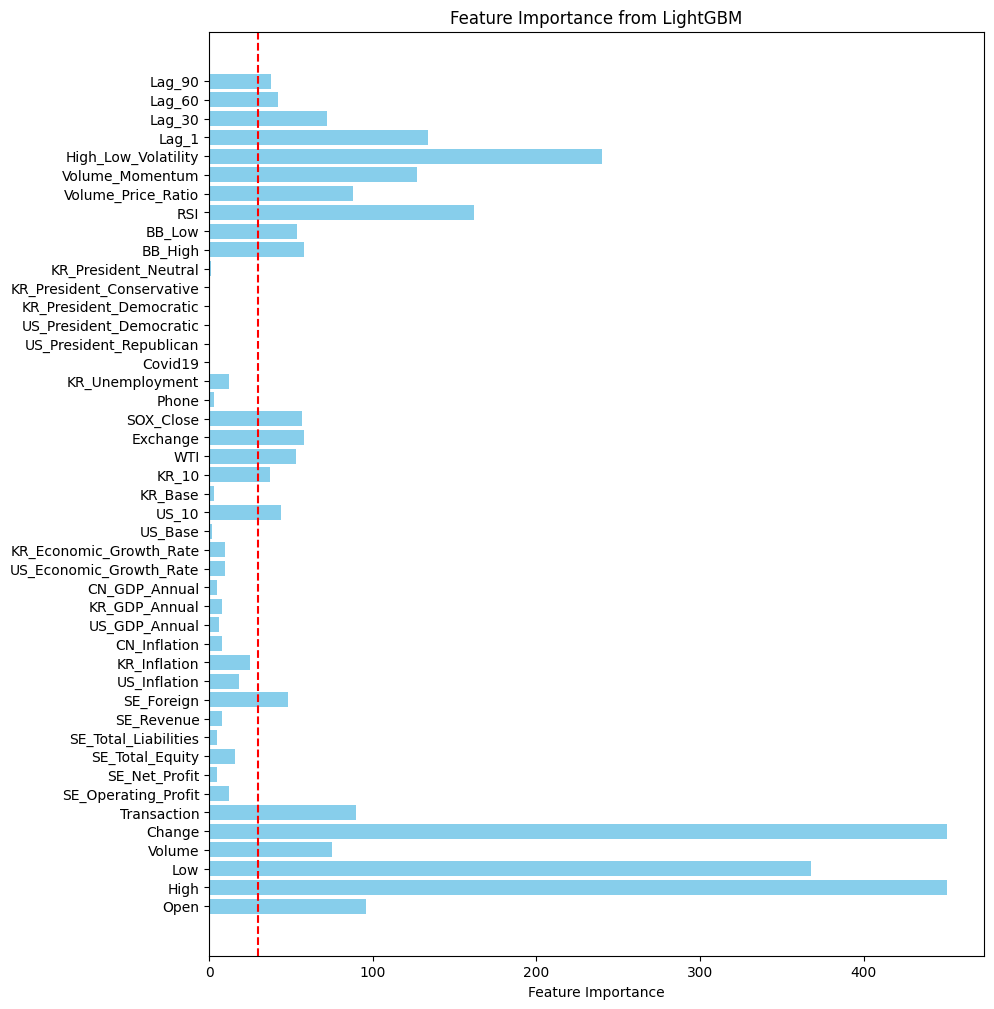

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_1, label=y_train_same_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 14547.445297


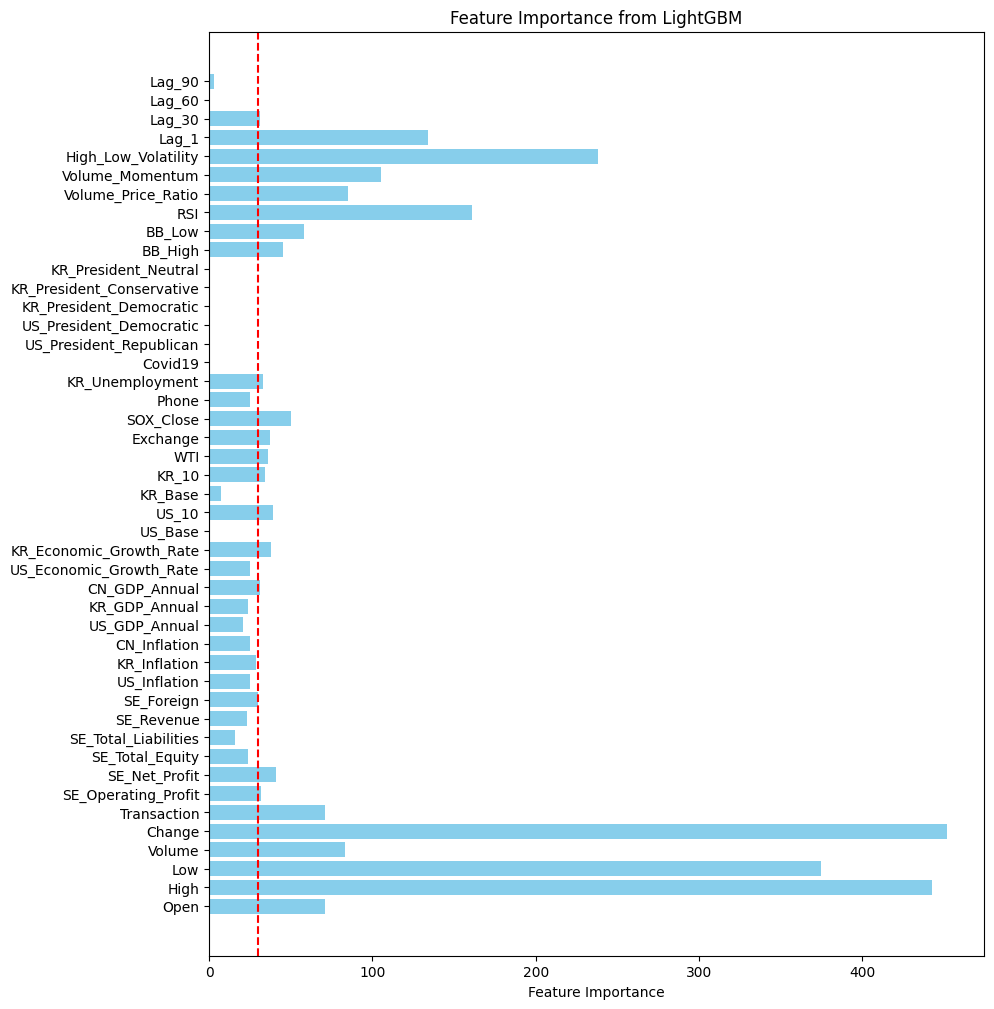

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_1, label=y_train_int_df_1)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6359
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


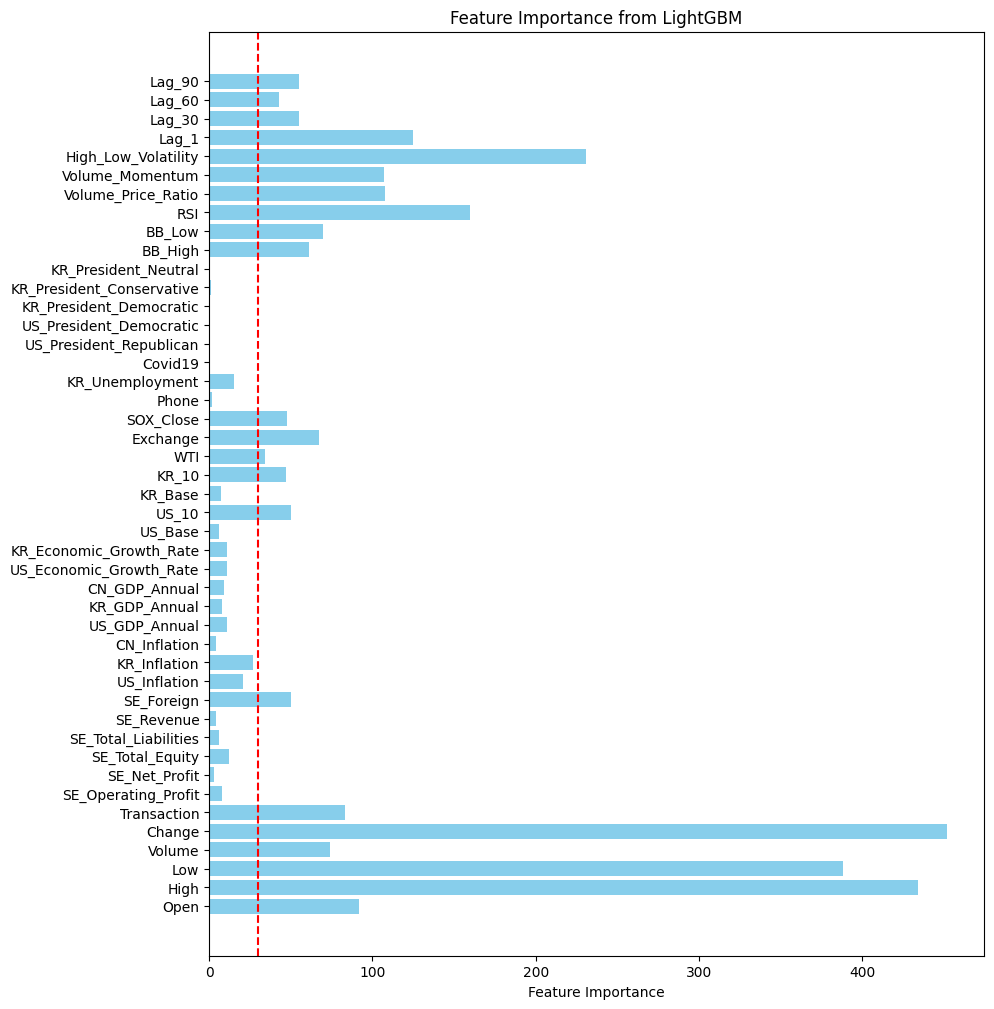

In [ ]:
lgb_data = lgb.Dataset(x_train_same_df_3, label=y_train_same_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9482
[LightGBM] [Info] Number of data points in the train set: 3519, number of used features: 44
[LightGBM] [Info] Start training from score 9.445810


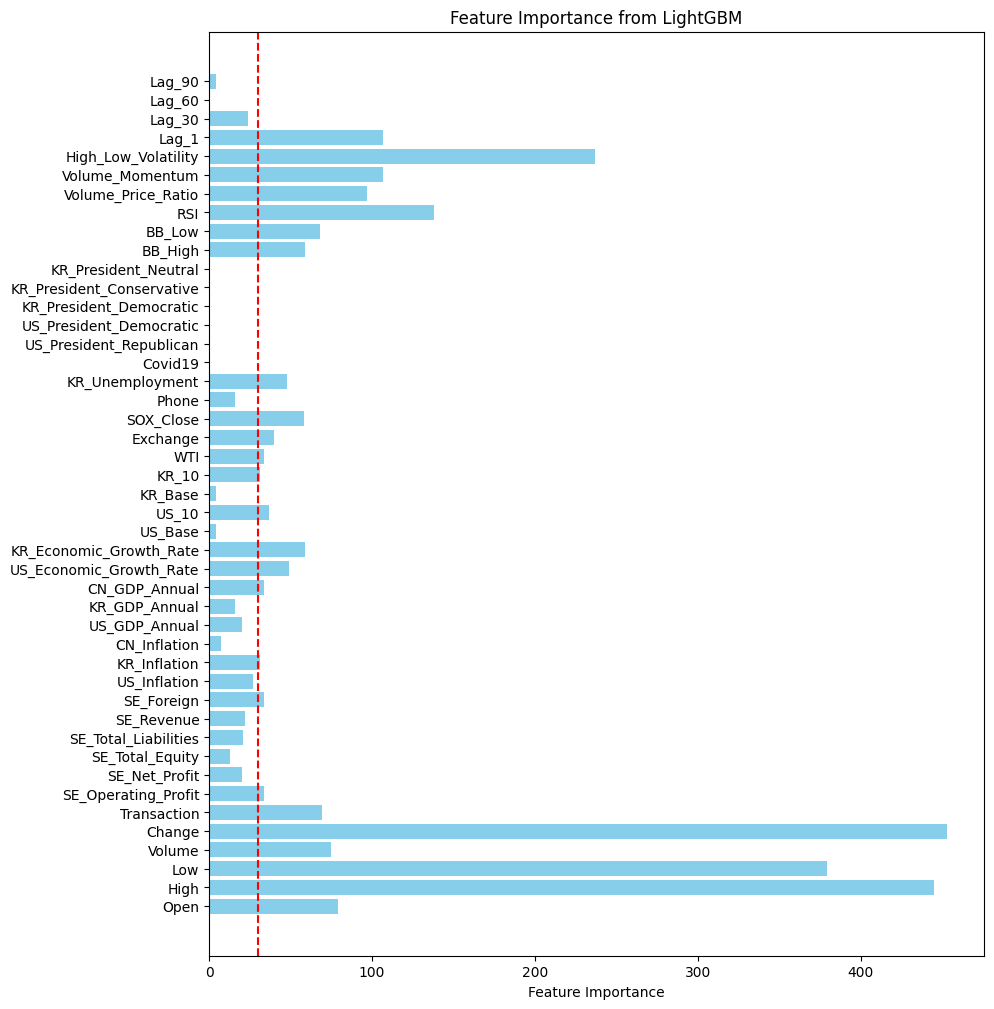

In [ ]:
lgb_data = lgb.Dataset(x_train_int_df_3, label=y_train_int_df_3)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()

##### Heatmap - 50

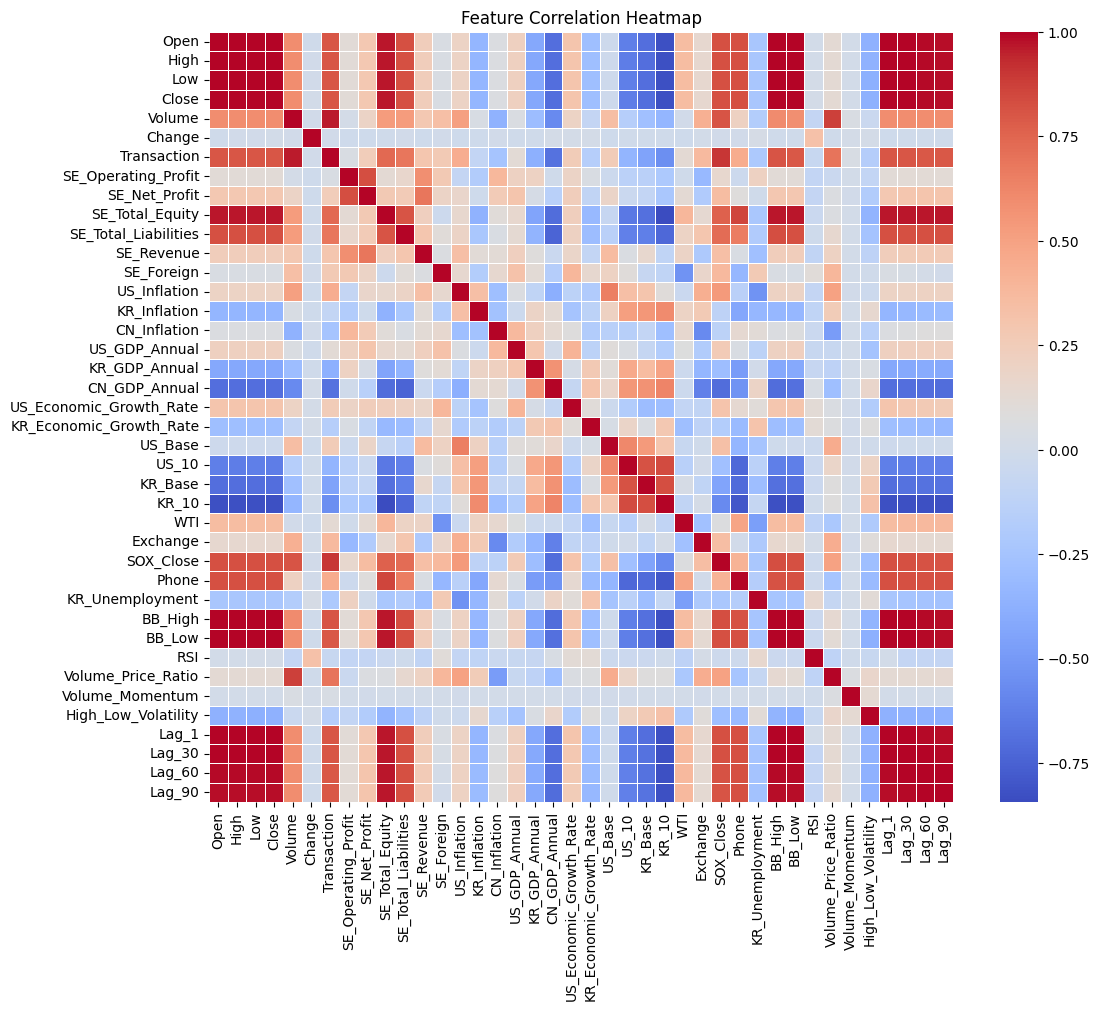

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = same_df.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

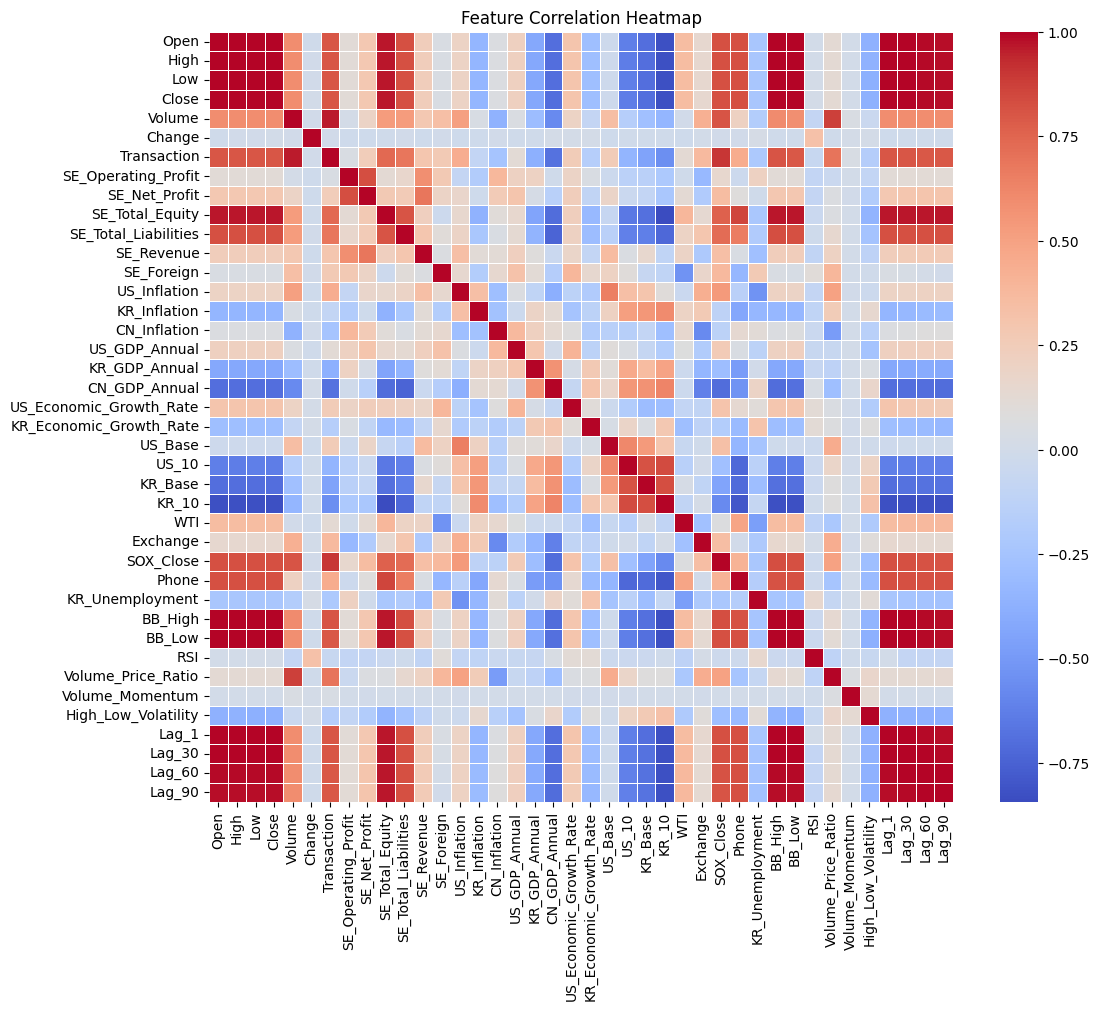

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = int_df.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

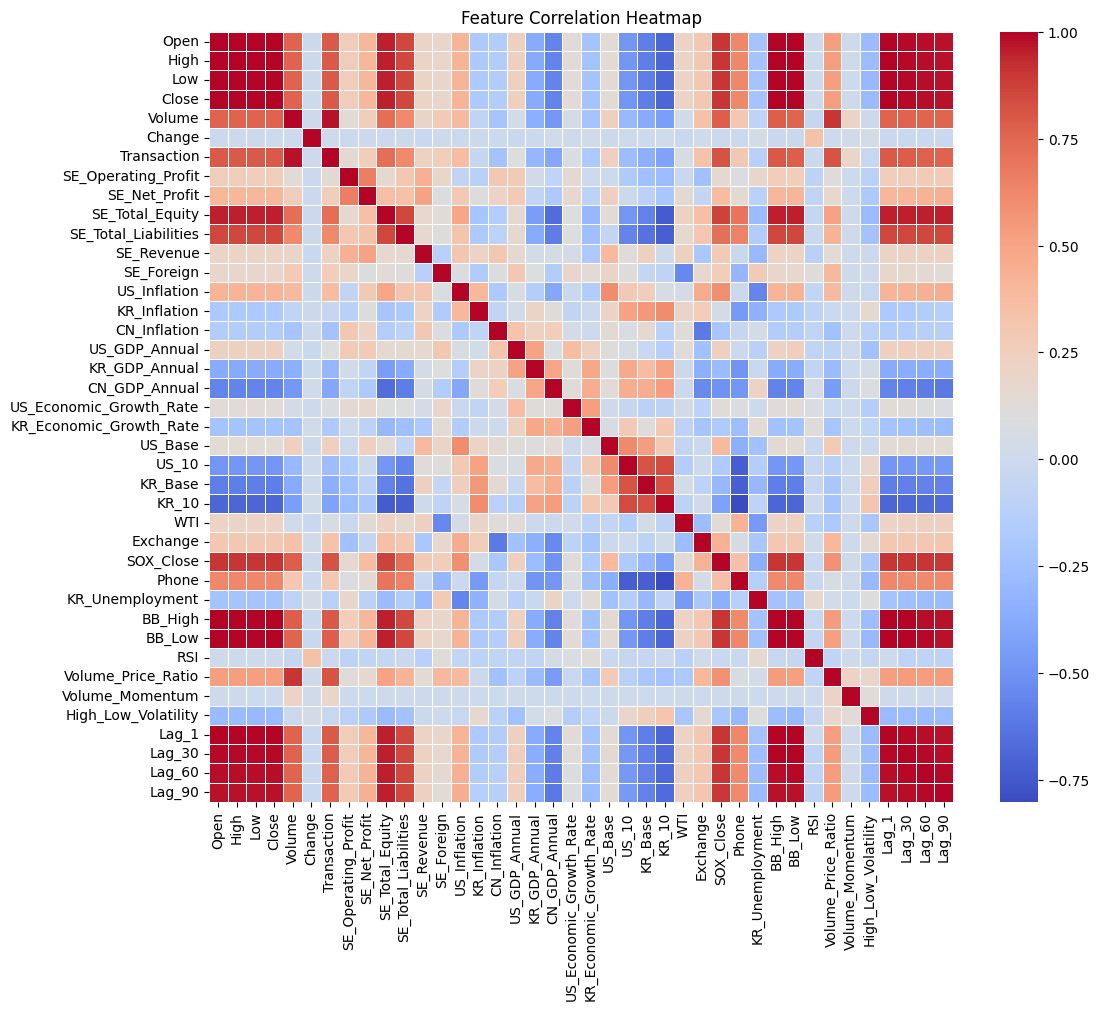

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = same_df_1.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

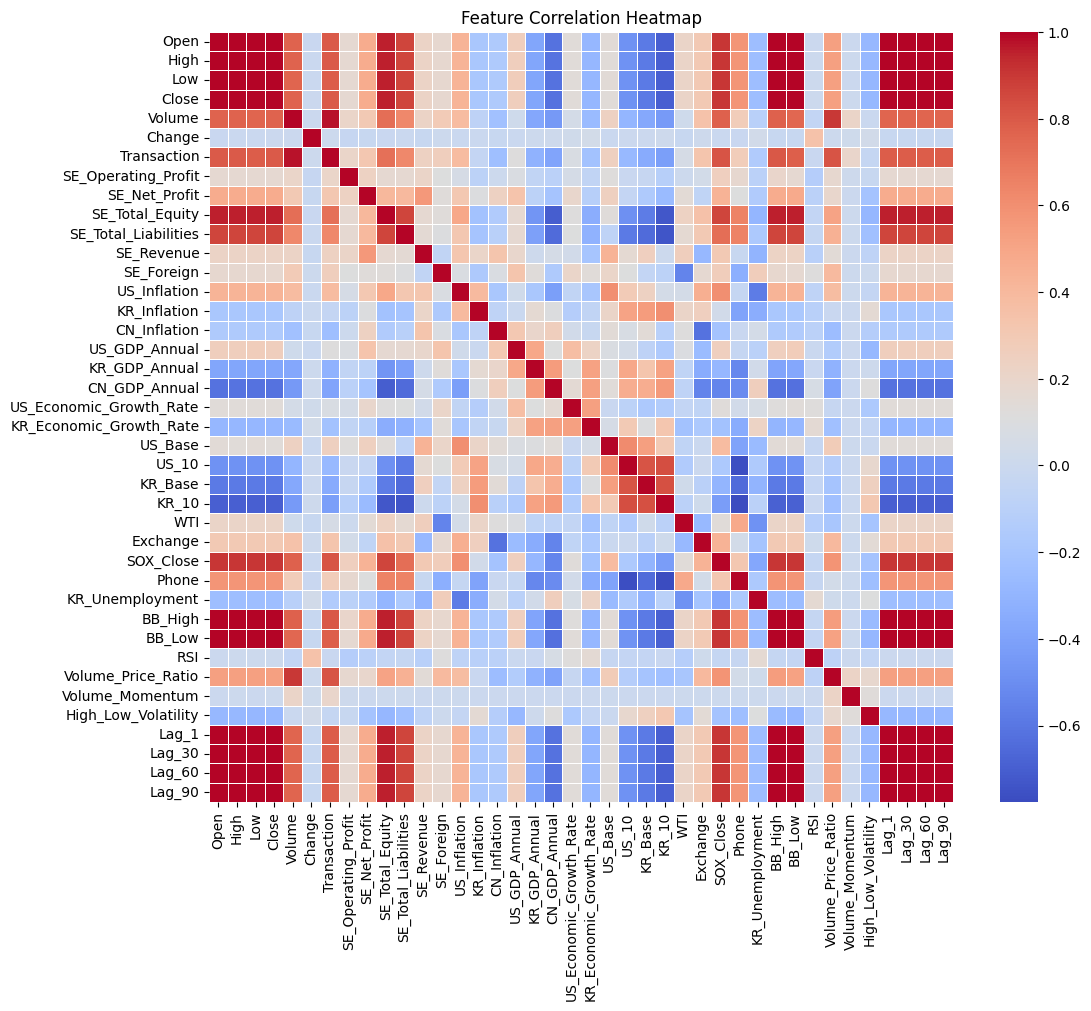

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = int_df_1.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

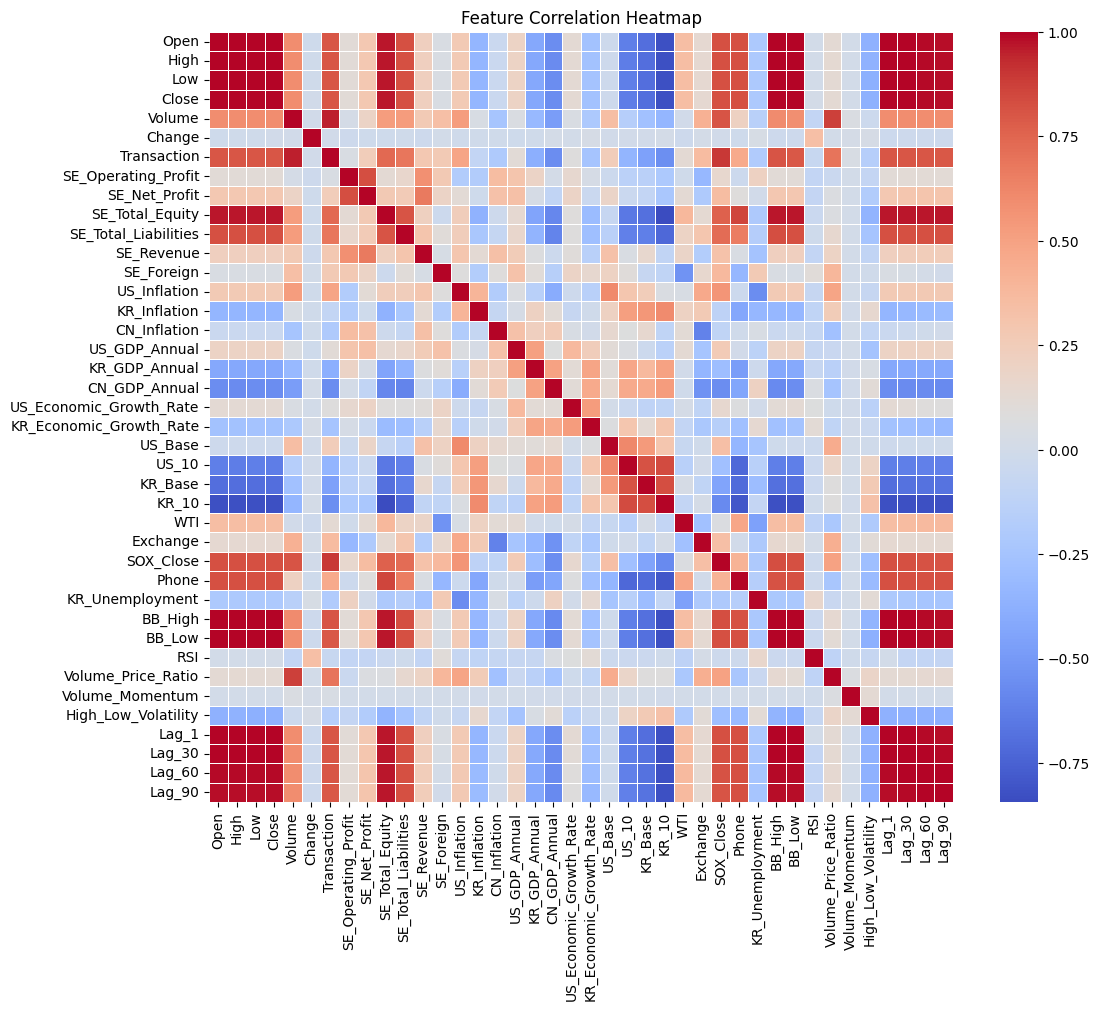

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = same_df_3.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

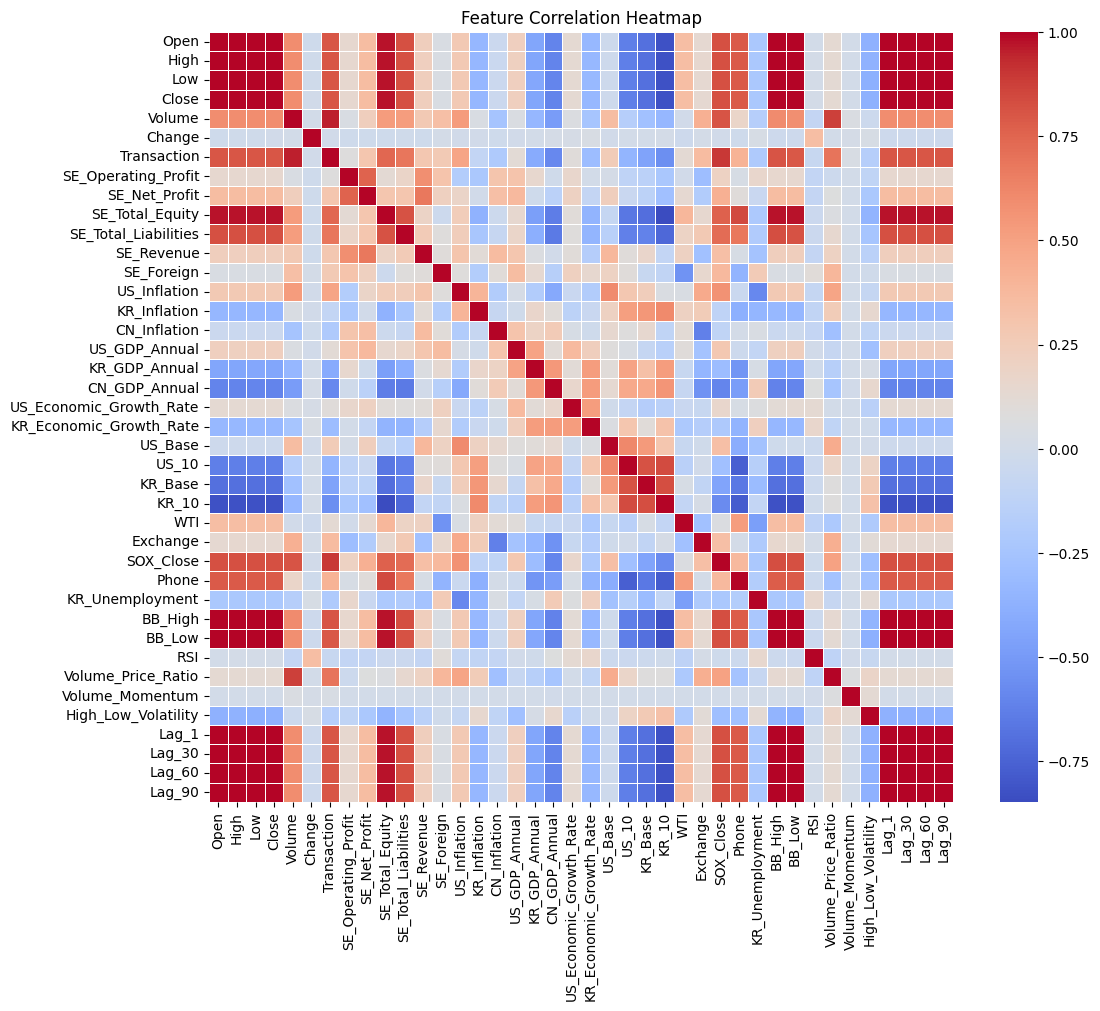

In [ ]:
import seaborn as sns

# 숫자형 데이터만 선택
numeric_columns = int_df_3.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_columns.corr()

# 상관계수 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 액면 분할 처리

In [3]:
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/Preprocessing_Code/사본/one_hot_int.csv')

In [12]:
int_df.head()

,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,SE_Total_Equity,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,8.058327,8.125631,8.051978,8.116716,17.490706,0.304463,25.607421,29.836003,29.42326,30.451537,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2001-01-03,8.079928,8.137396,8.077137,8.122668,17.449330,0.304463,25.571998,29.837042,29.42326,30.451537,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2001-01-04,8.240121,8.261010,8.205218,8.237479,17.959753,1.027374,26.839751,29.838044,29.42326,30.451537,...,-3.095450,8.122668,8.122668,8.122668,8.122668,True,False,True,False,False
2001-01-05,8.232174,8.273847,8.216088,8.268732,17.959753,1.750286,26.442709,29.839010,29.42326,30.451537,...,-3.095450,8.237479,8.237479,8.237479,8.237479,True,False,True,False,False
2001-01-08,8.248006,8.271293,8.237479,8.263590,17.560192,-0.318066,25.823783,29.841696,29.42326,30.451537,...,-3.396056,8.268732,8.268732,8.268732,8.268732,True,False,True,False,False


In [11]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5862 entries, 2001-01-02 to 2024-09-30
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5862 non-null   float64
 1   High                       5862 non-null   float64
 2   Low                        5862 non-null   float64
 3   Close                      5862 non-null   float64
 4   Volume                     5862 non-null   float64
 5   Change                     5862 non-null   float64
 6   Transaction                5862 non-null   float64
 7   SE_Operating_Profit        5862 non-null   float64
 8   SE_Net_Profit              5862 non-null   float64
 9   SE_Total_Equity            5862 non-null   float64
 10  SE_Total_Liabilities       5862 non-null   float64
 11  SE_Revenue                 5862 non-null   float64
 12  SE_Foreign                 5862 non-null   float64
 13  US_Inflation               5862 non-nu

In [10]:
int_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'BB_High', 'BB_Low', 'RSI',
       'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1',
       'Lag_30', 'Lag_60', 'Lag_90', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral'],
      dtype='object')

In [9]:
int_df['Date'] = pd.to_datetime(int_df['Date'])

KeyError: 'Date'

In [8]:
int_df.set_index('Date', inplace = True)
int_df.info()

KeyError: "None of ['Date'] are in the columns"

In [15]:
int_df.index = pd.to_datetime(int_df.index)

In [16]:
int_df.index

DatetimeIndex(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
               '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11',
               '2001-01-12', '2001-01-15',
               ...
               '2024-09-12', '2024-09-13', '2024-09-19', '2024-09-20',
               '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=5862, freq=None)

In [18]:
int_df.head()

,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,SE_Total_Equity,...,High_Low_Volatility,Lag_1,Lag_30,Lag_60,Lag_90,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,8.058327,8.125631,8.051978,8.116716,17.490706,0.304463,25.607421,29.836003,29.42326,30.451537,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2001-01-03,8.079928,8.137396,8.077137,8.122668,17.449330,0.304463,25.571998,29.837042,29.42326,30.451537,...,-3.095450,8.116716,8.116716,8.116716,8.116716,True,False,True,False,False
2001-01-04,8.240121,8.261010,8.205218,8.237479,17.959753,1.027374,26.839751,29.838044,29.42326,30.451537,...,-3.095450,8.122668,8.122668,8.122668,8.122668,True,False,True,False,False
2001-01-05,8.232174,8.273847,8.216088,8.268732,17.959753,1.750286,26.442709,29.839010,29.42326,30.451537,...,-3.095450,8.237479,8.237479,8.237479,8.237479,True,False,True,False,False
2001-01-08,8.248006,8.271293,8.237479,8.263590,17.560192,-0.318066,25.823783,29.841696,29.42326,30.451537,...,-3.396056,8.268732,8.268732,8.268732,8.268732,True,False,True,False,False


In [19]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

In [20]:
x_int = int_df[features].values
y_int = int_df[target].values

x_train_int_df = x_int[:3518]
y_train_int_df = y_int[:3518]

x_val_int_df = x_int[3518:4691]
y_val_int_df = y_int[3518:4691]

x_test_int_df = x_int[4691:]
y_test_int_df = y_int[4691:]

In [21]:
!pip install lightgbm

In [22]:
import lightgbm as lgb
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9481
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 44
[LightGBM] [Info] Start training from score 9.445564


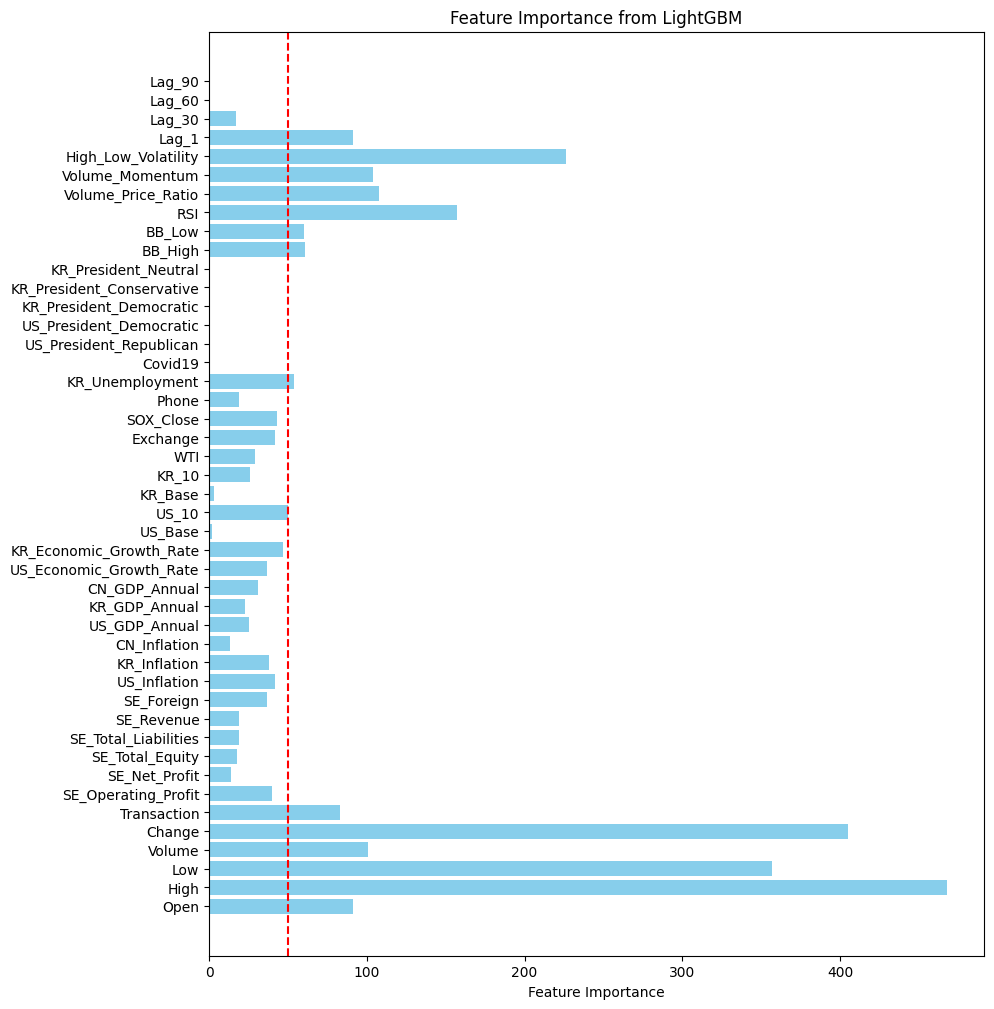

In [23]:
lgb_data = lgb.Dataset(x_train_int_df, label=y_train_int_df)

# LightGBM 모델 학습
params = {
    'objective': 'regression',  # 회귀 문제
    'metric': 'rmse',          # 평가지표
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,   # 피처 샘플링 비율
    'bagging_fraction': 0.8,   # 데이터 샘플링 비율
    'bagging_freq': 5,
    'seed': 42
}

model = lgb.train(params, lgb_data, num_boost_round=100)

# Feature Importance 확인
importance = model.feature_importance()
feature_names = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction',
       'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
       'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate',
       'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican',
       'US_President_Democratic', 'KR_President_Democratic',
       'KR_President_Conservative', 'KR_President_Neutral', 'BB_High',
       'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum',
       'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

# 중요도 시각화
plt.figure(figsize=(10, 12))
plt.barh(feature_names, importance, color='skyblue')
plt.axvline(x=50, color='red', linestyle='--', label='Vertical Line')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LightGBM')
plt.show()